In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Goal is to predict which employees are at high risk of churn**

In [ ]:
 !pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurav065
Your Kaggle Key: ··········


100%|██████████| 50.1k/50.1k [00:00<00:00, 17.2MB/s]

In [ ]:
#loading the dataset
df=pd.read_csv('/content/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null values in any of the columns. Attrition is our target variable.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [ ]:
#dropping these columns because they are of no use for prediction
df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
columns=list(df.columns)
columns

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
categorical=[data for data in columns if df[data].dtype=='object']
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
numerical=[data for data in df.columns if df[data].dtypes!='object']
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
#categorical variables vs Attrition
for data in categorical:
 print(pd.crosstab(df[data],df['Attrition'],margins=True))
 print('***********************************************')

Attrition    No  Yes   All
Attrition                 
No         1233    0  1233
Yes           0  237   237
All        1233  237  1470
***********************************************
Attrition            No  Yes   All
BusinessTravel                    
Non-Travel          138   12   150
Travel_Frequently   208   69   277
Travel_Rarely       887  156  1043
All                1233  237  1470
***********************************************
Attrition                 No  Yes   All
Department                             
Human Resources           51   12    63
Research & Development   828  133   961
Sales                    354   92   446
All                     1233  237  1470
***********************************************
Attrition           No  Yes   All
EducationField                   
Human Resources     20    7    27
Life Sciences      517   89   606
Marketing          124   35   159
Medical            401   63   464
Other               71   11    82
Technical Degree   100   32   132

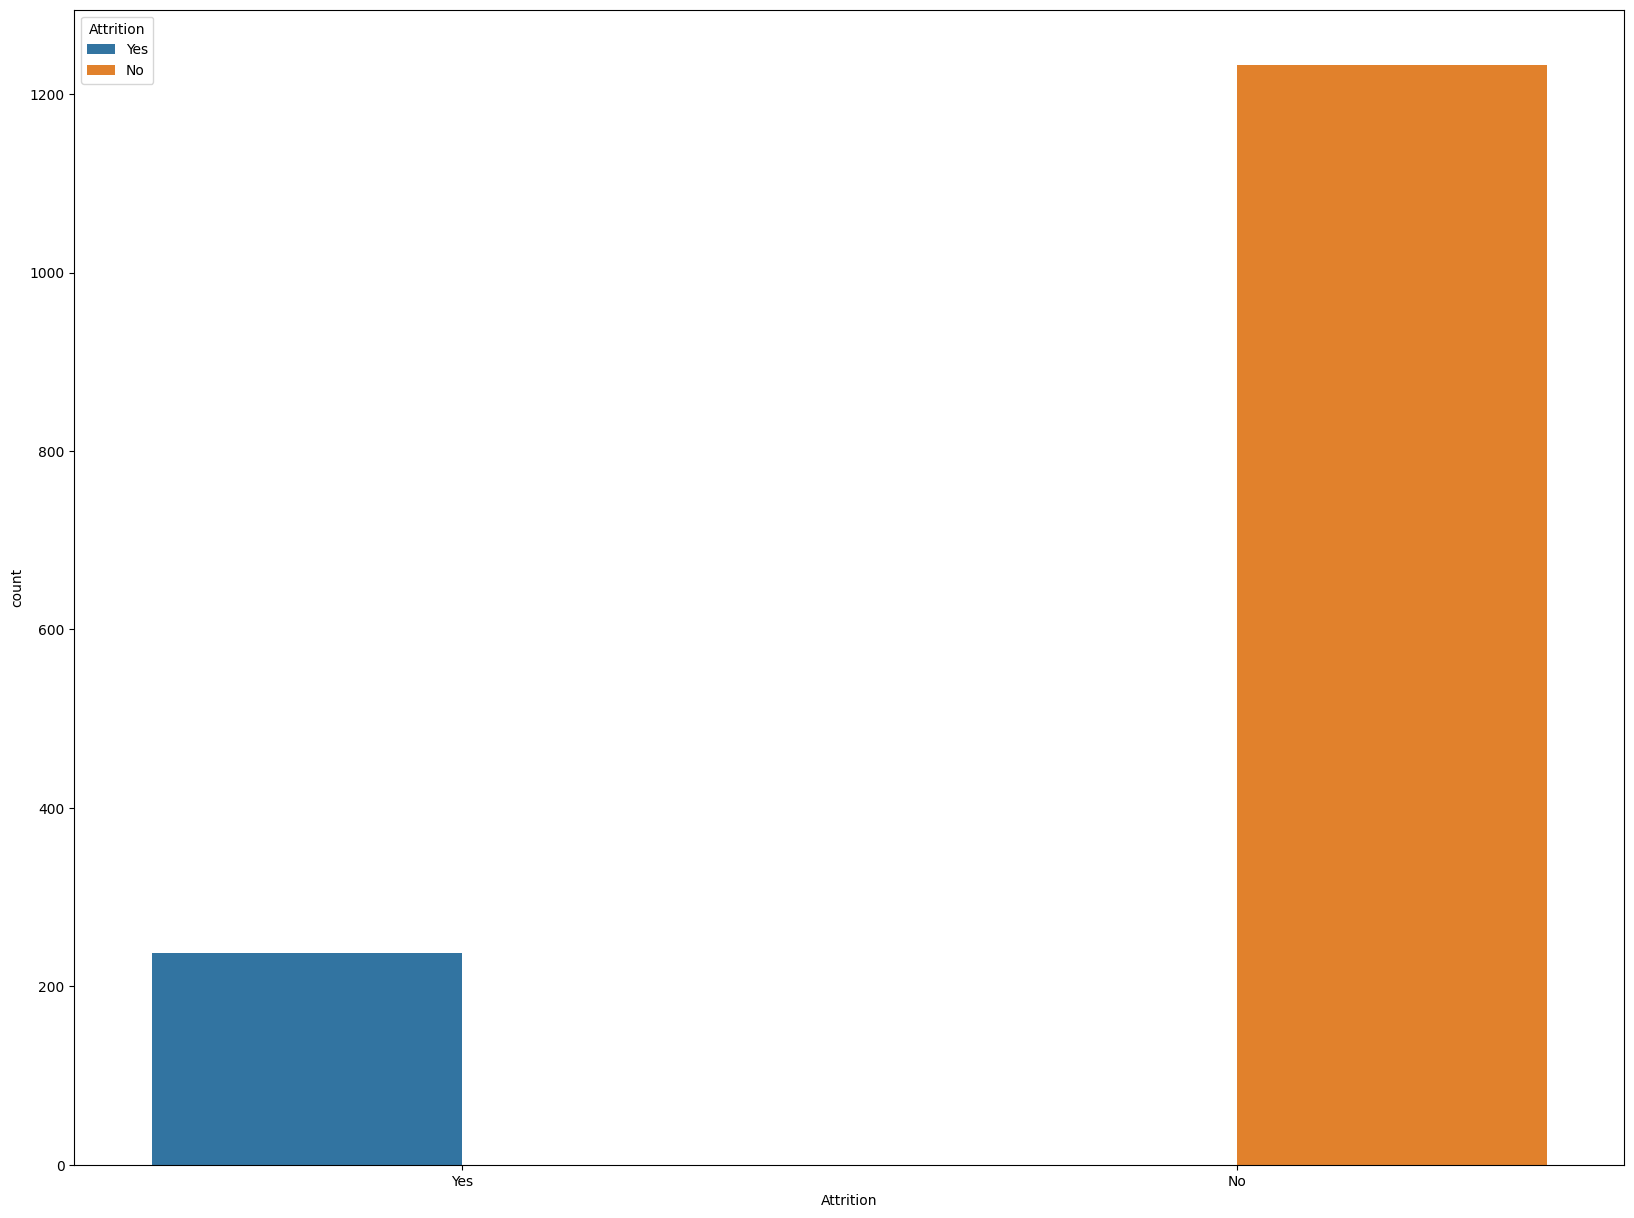

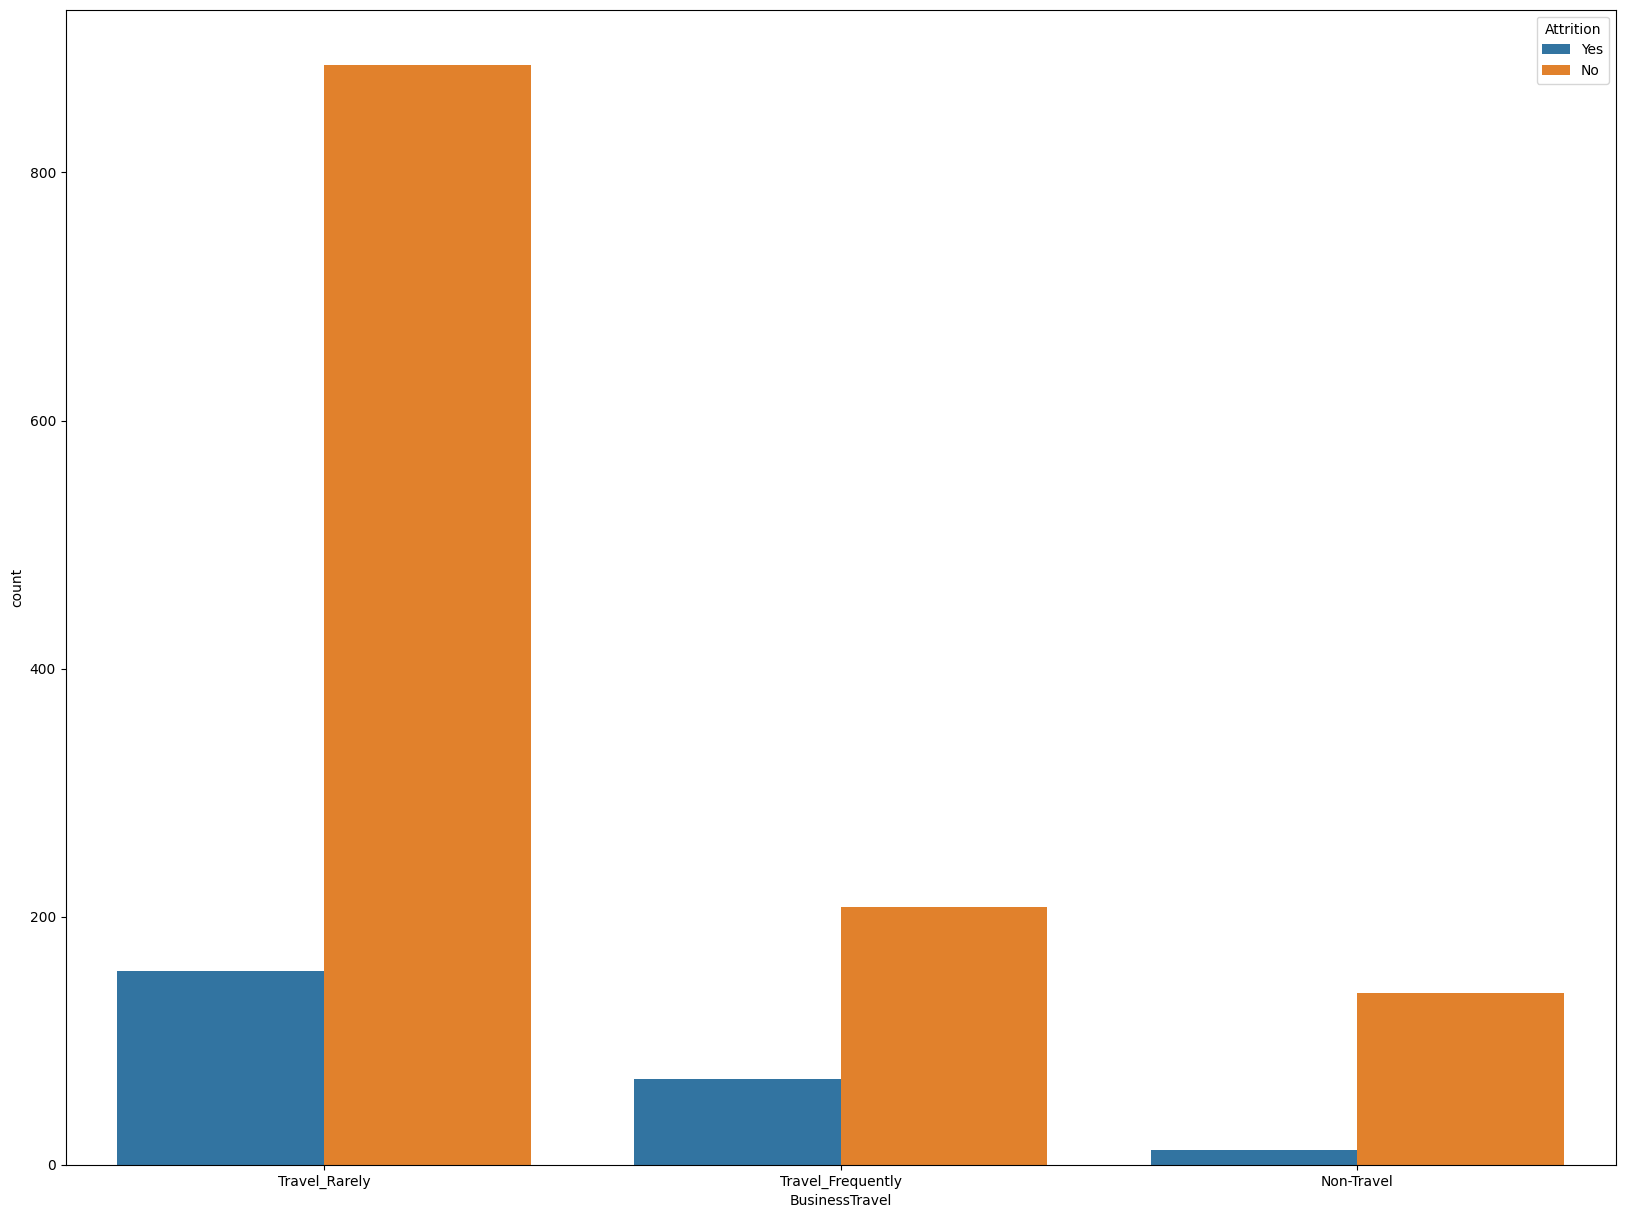

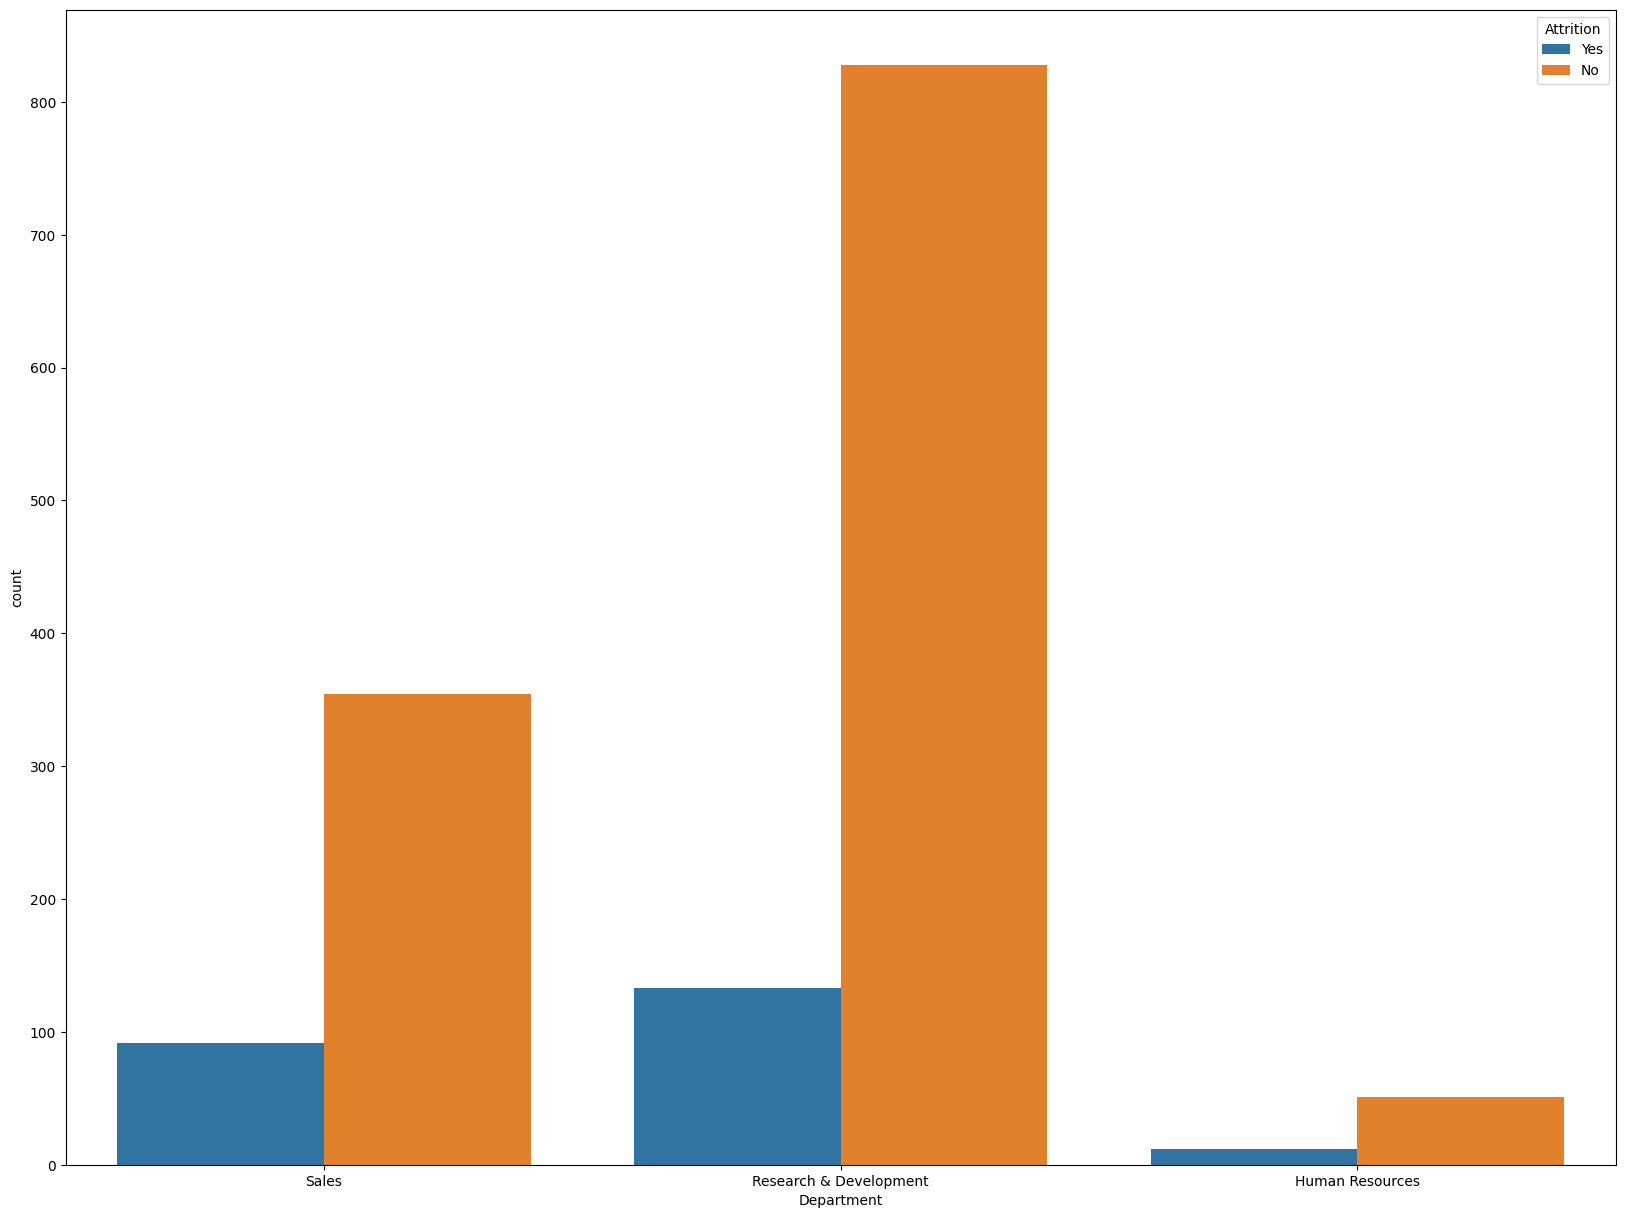

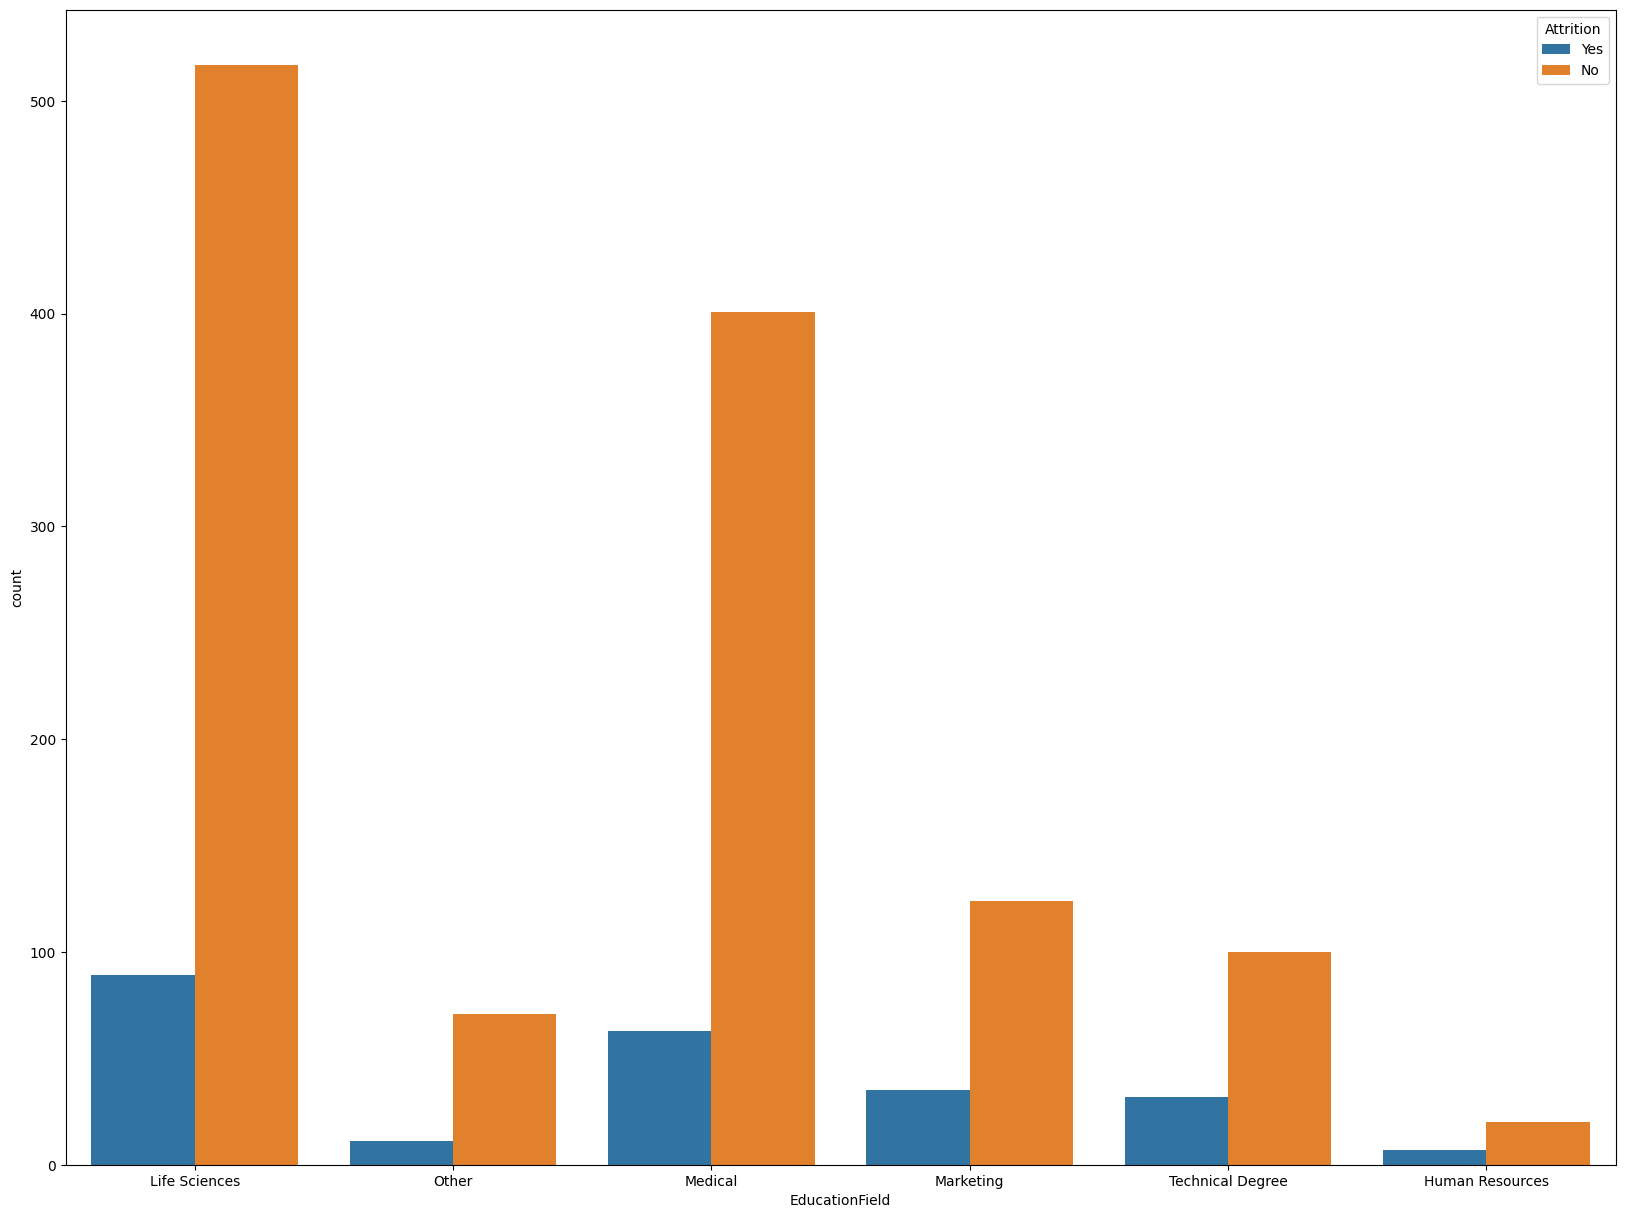

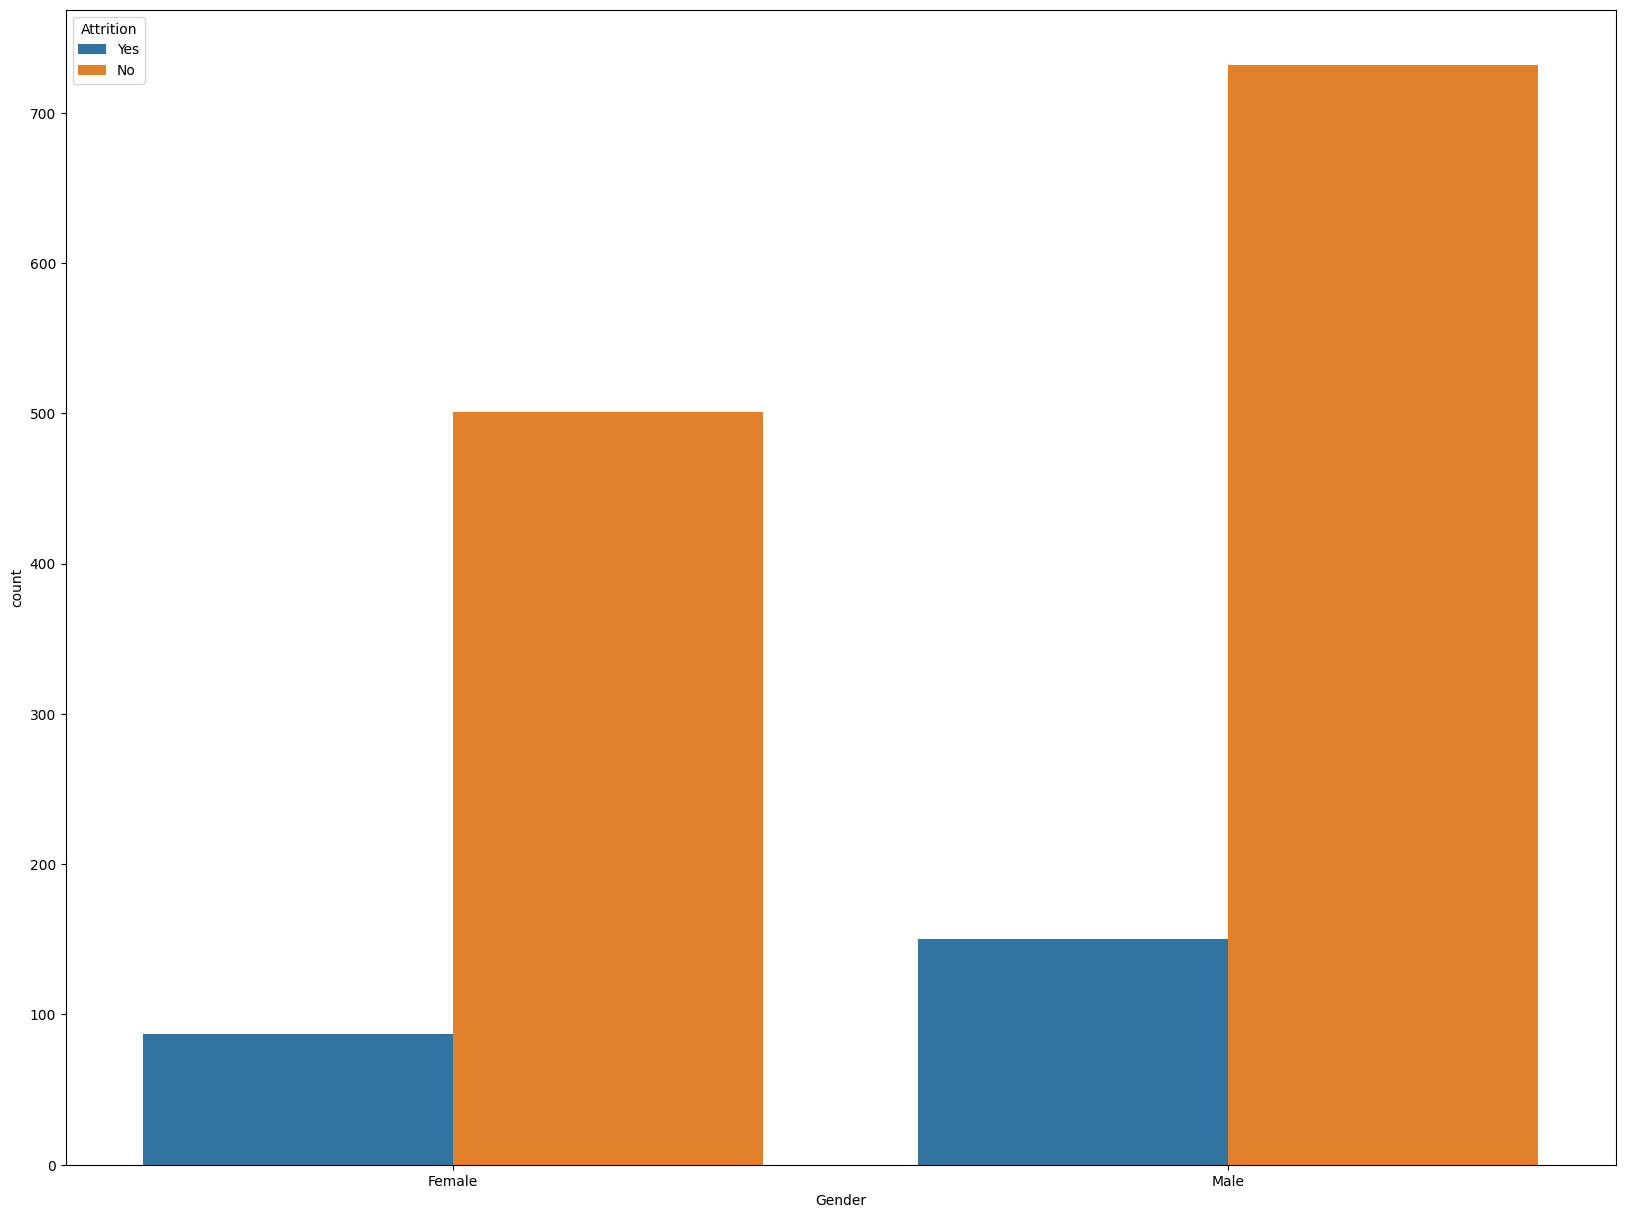

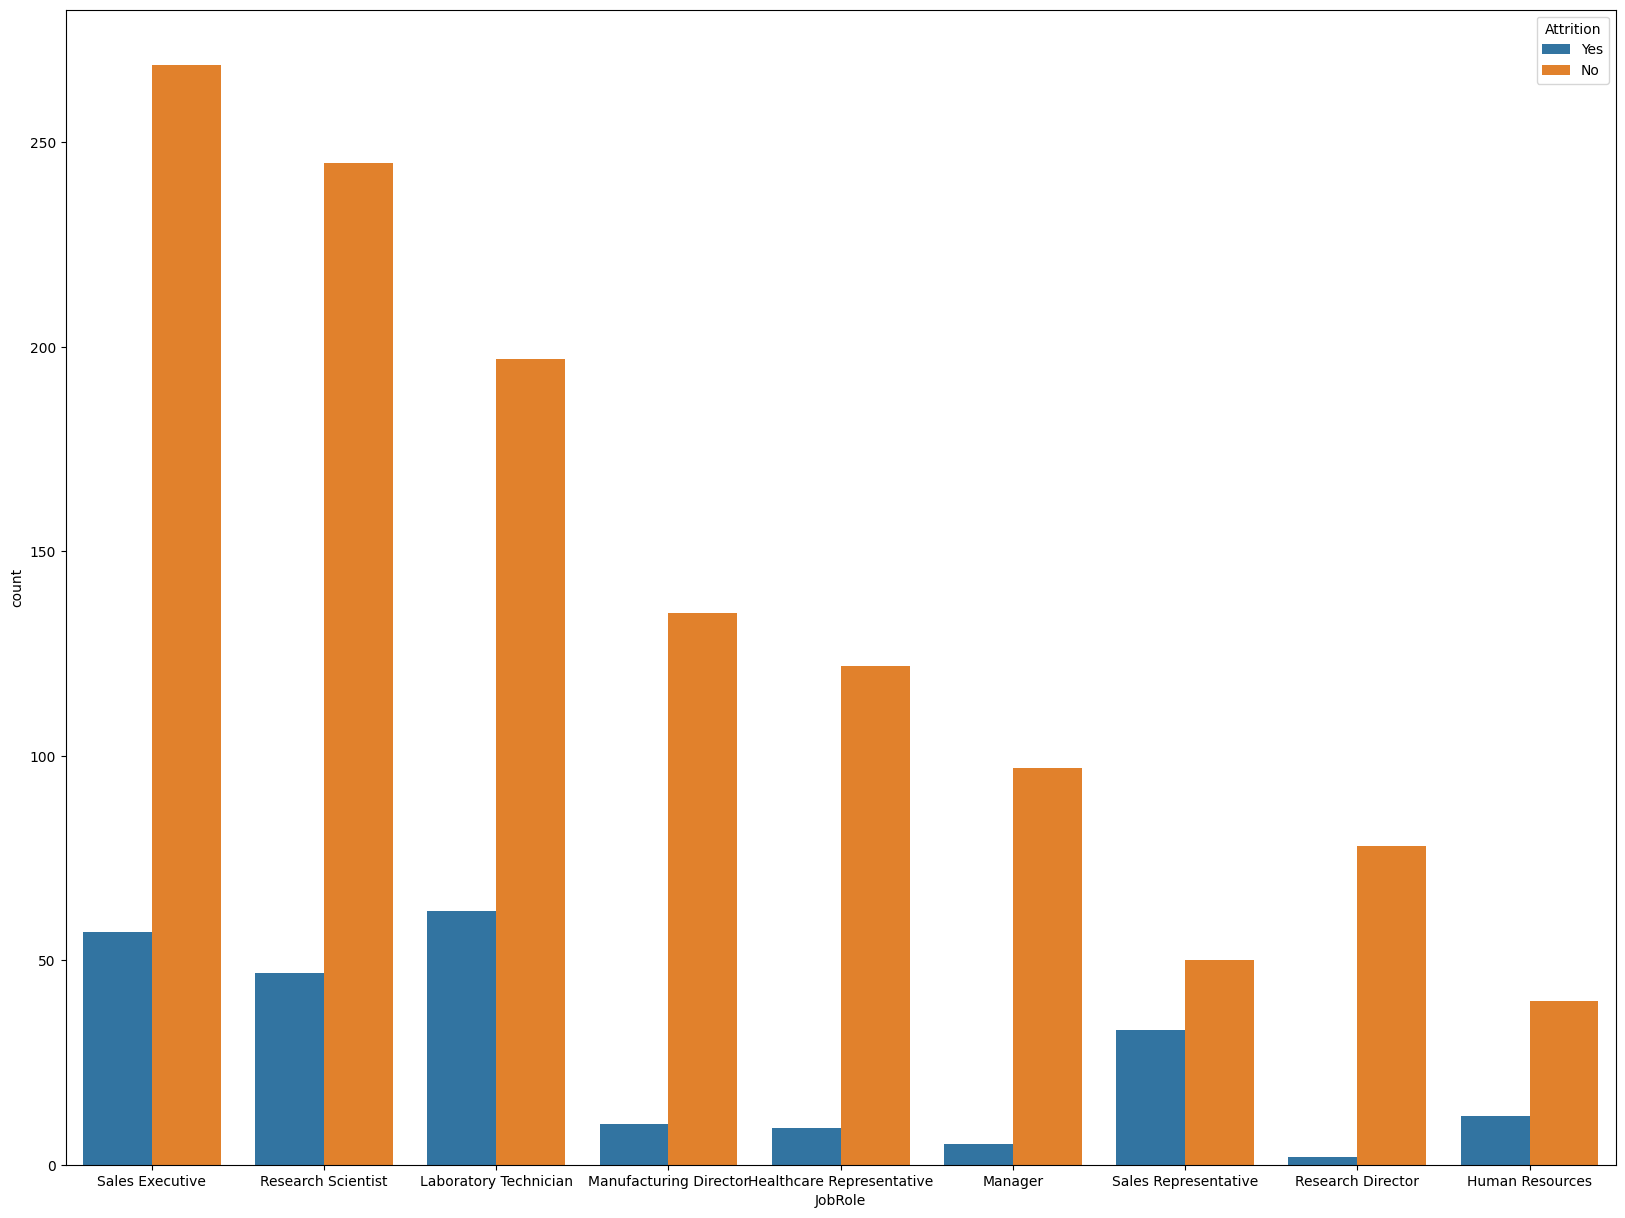

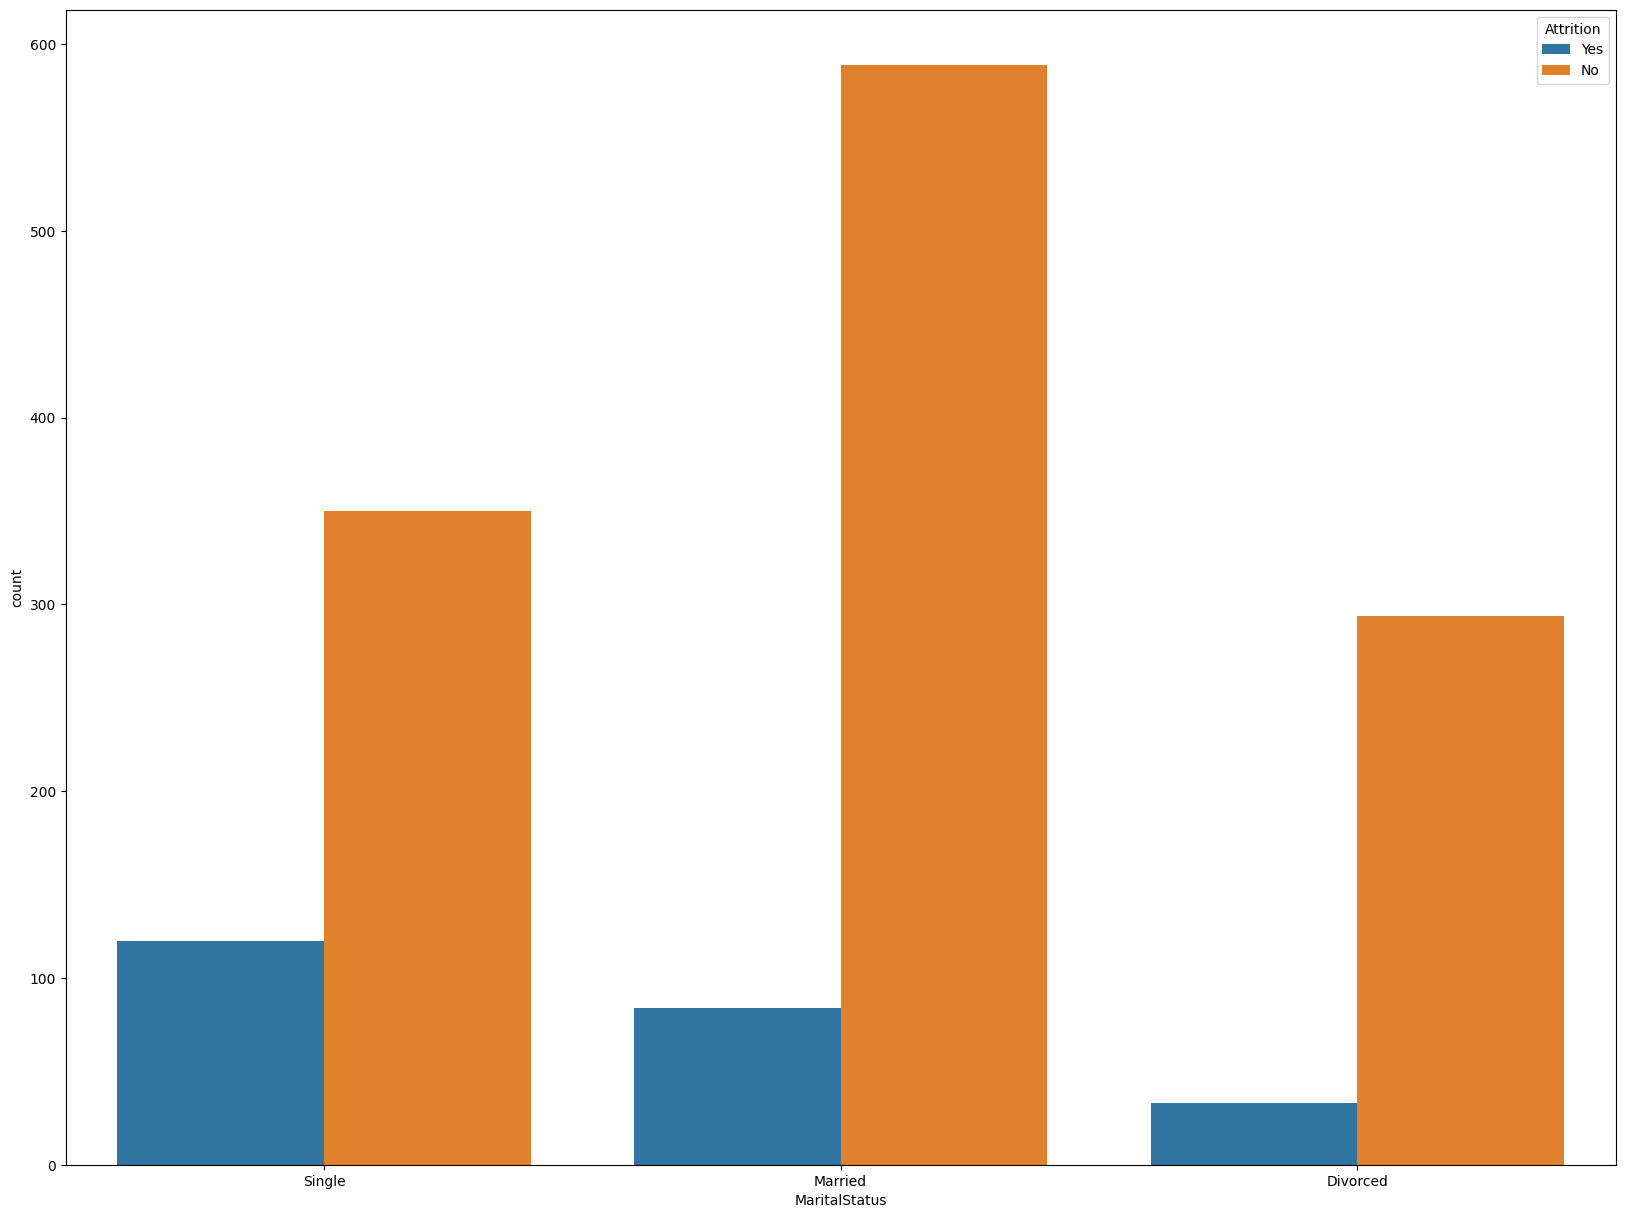

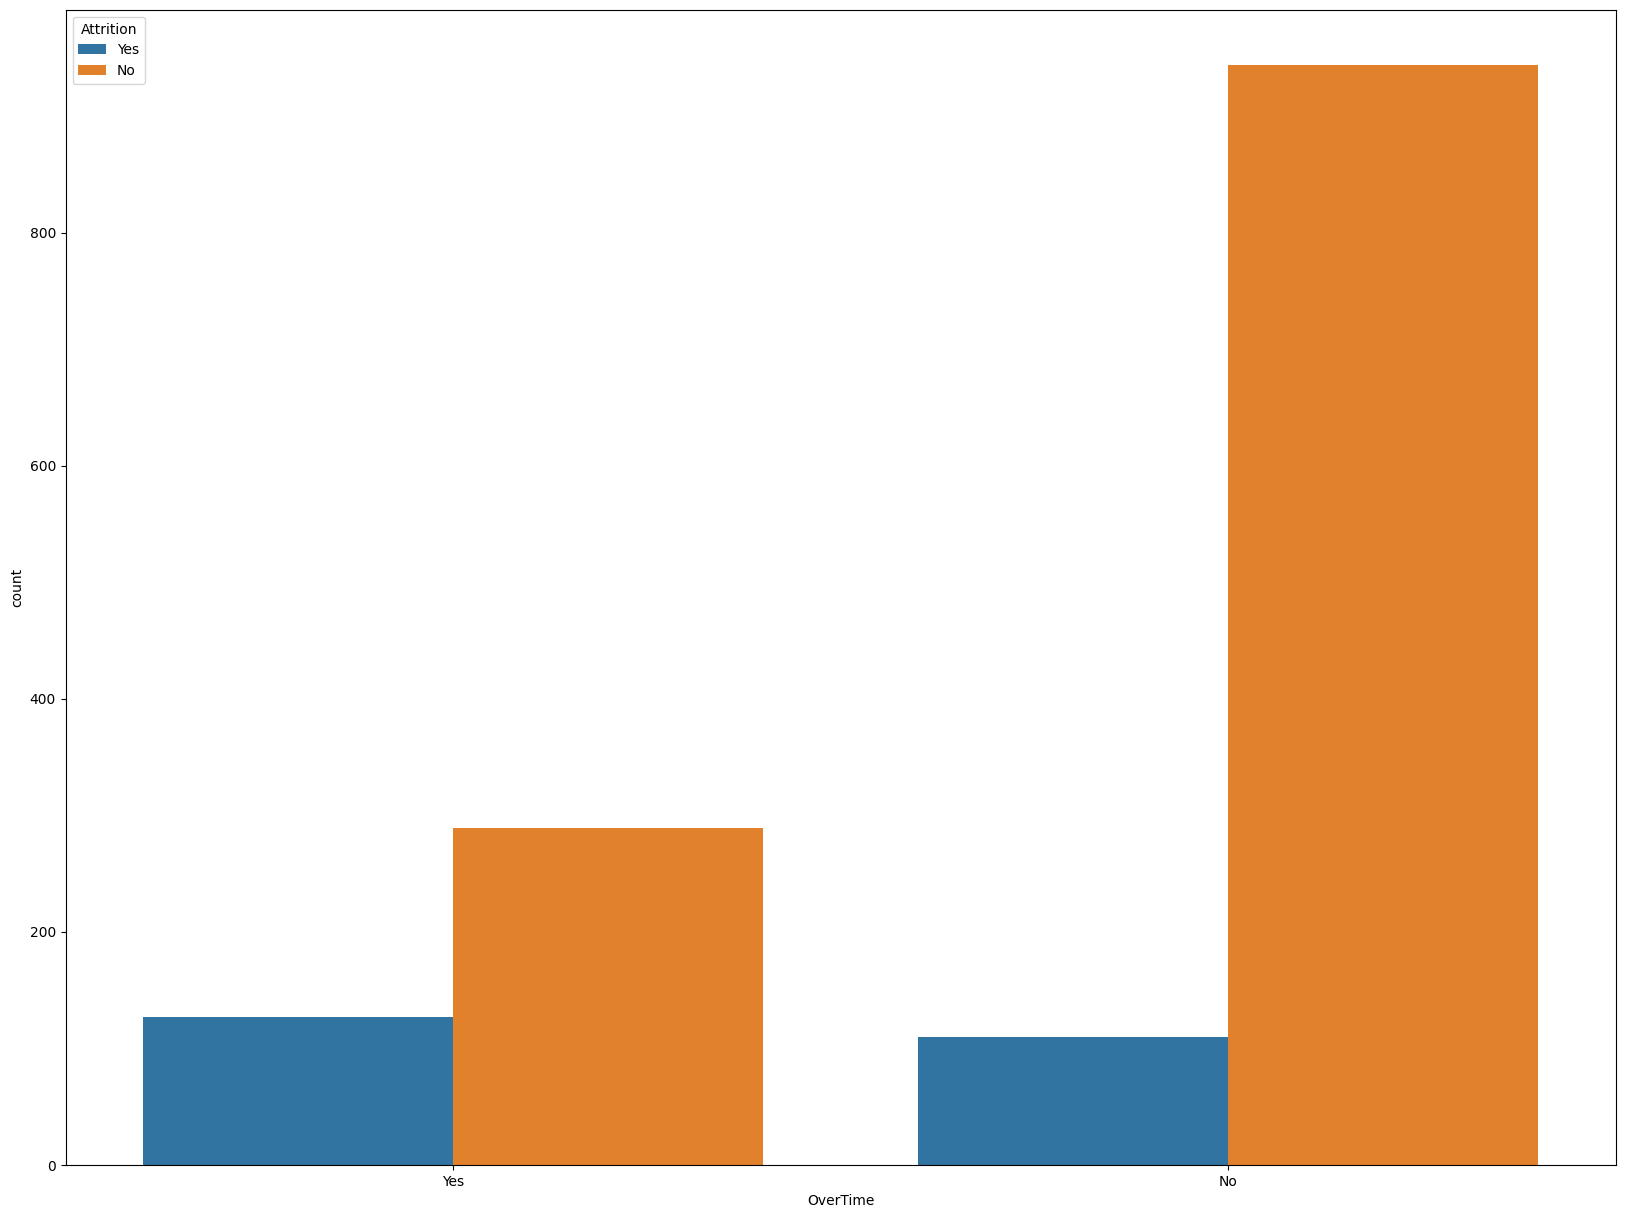

In [ ]:
#count plots for categorical variables
for i in categorical:
 plt.figure(figsize=(20,15))
 sns.countplot(x=i,hue='Attrition',data=df)
 
 plt.show()

1. Gender: Male employees quit more than female employees.
2. Business Travel: The employees who travel rarely are more likely to quit than other employees.
3. Marital Status: Employees who are single tend to quit their jobs more than the married or divorced.
4. Department: Research and Development employees don't quit their jobs as much as the other departments.
5. Job Role: Sales Executives, Laboratory Technicians and Research Scientists are more likely to quit than other employees.
6. Education Field: Employees from Life Sciences, Medical and Marketing educational background are more likely to stay than other employees of different educational background.
7. Over Time: Employees who do over time, quit more.

In [ ]:
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

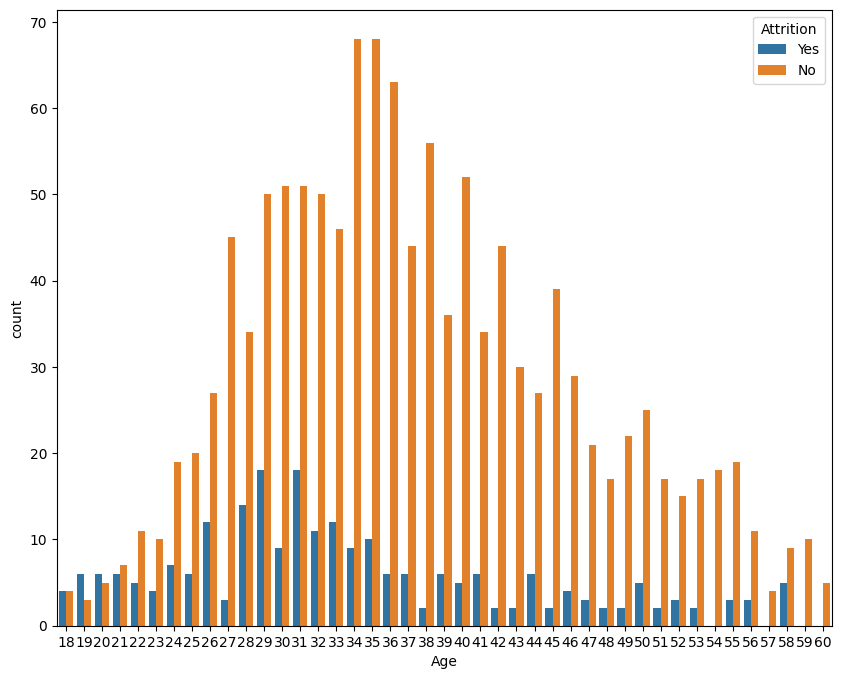

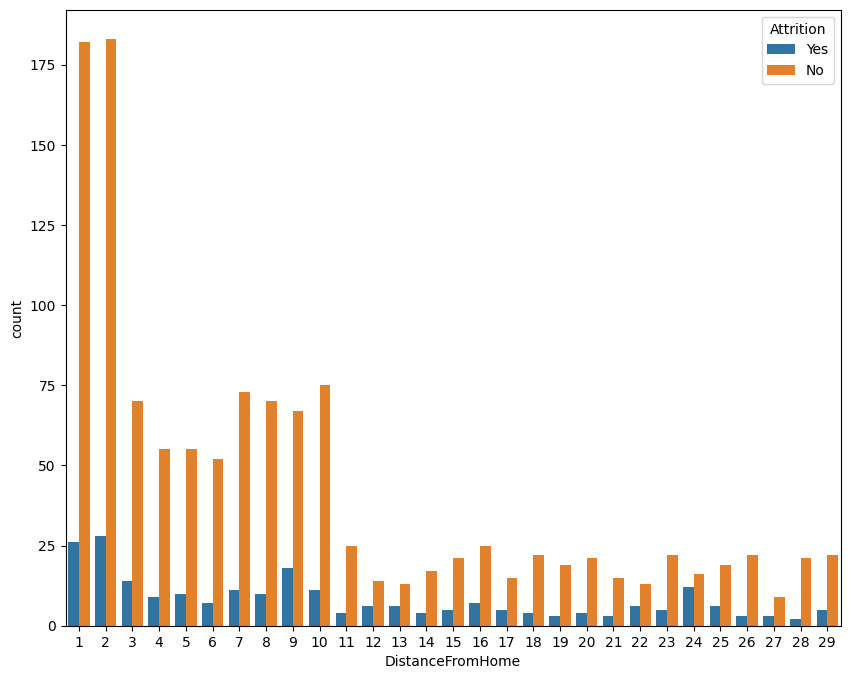

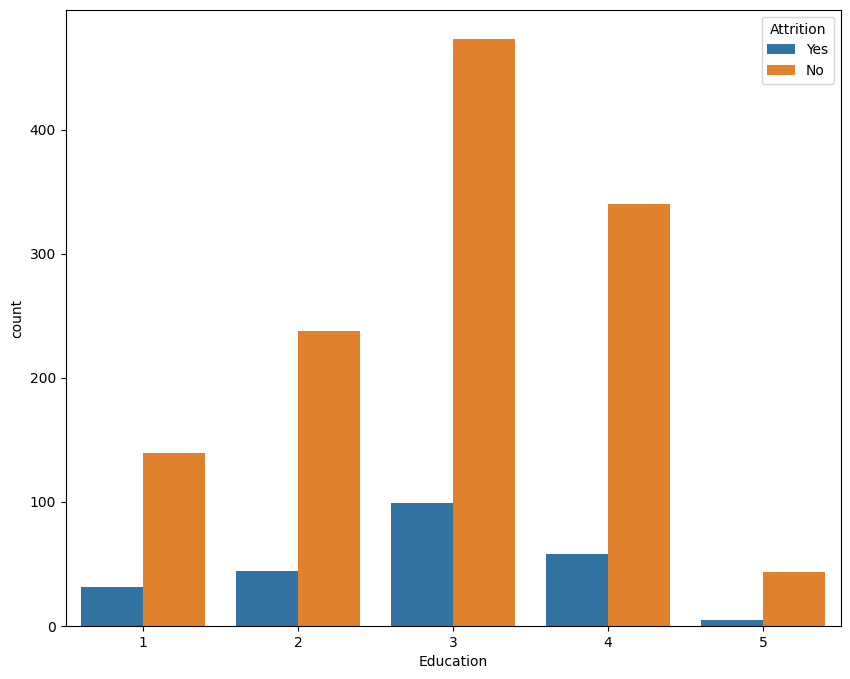

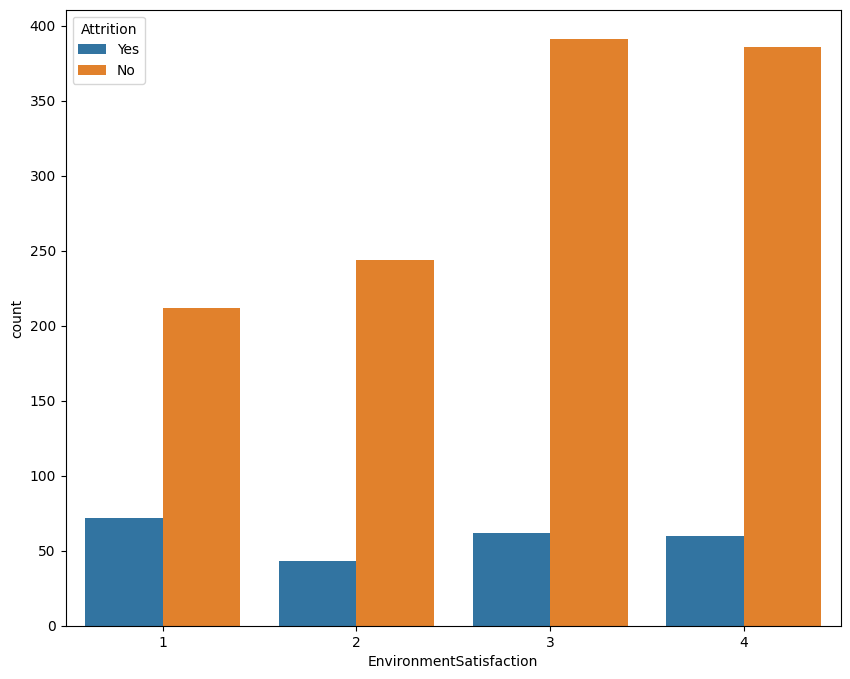

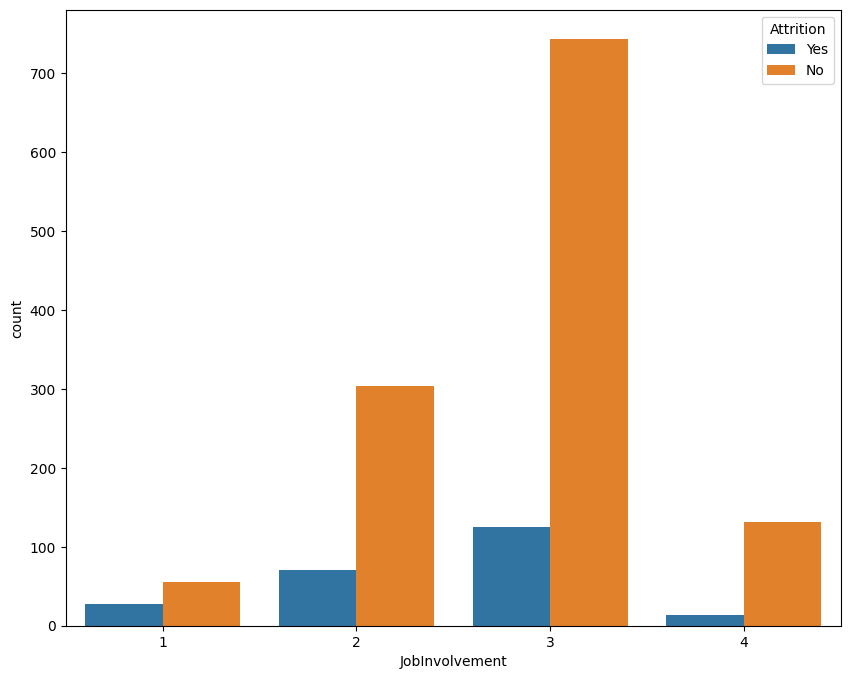

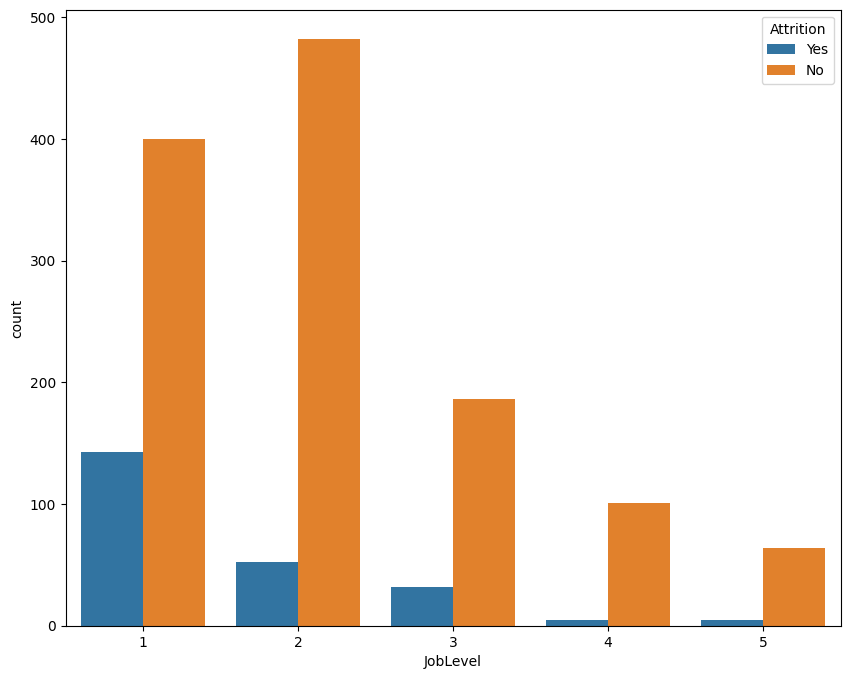

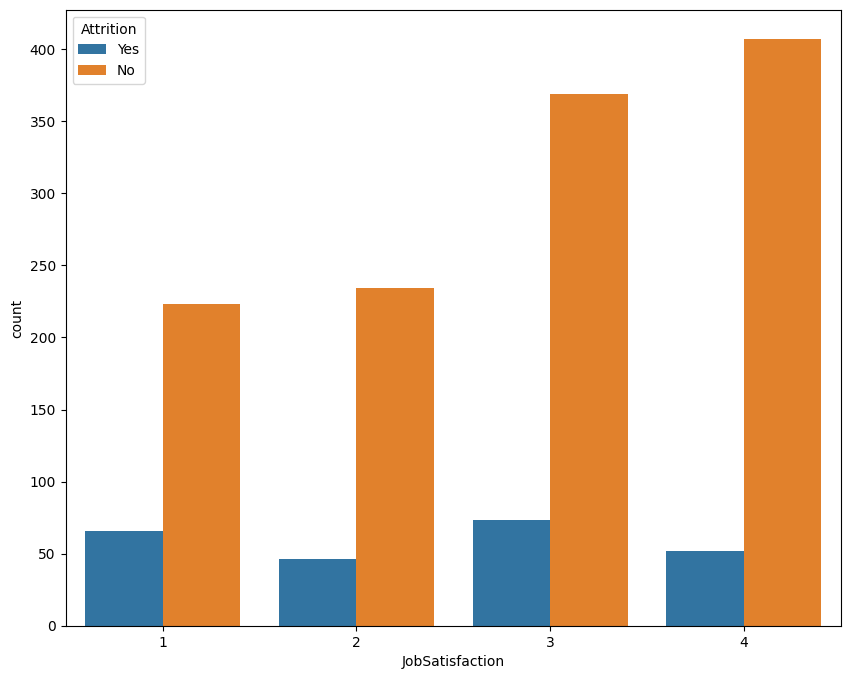

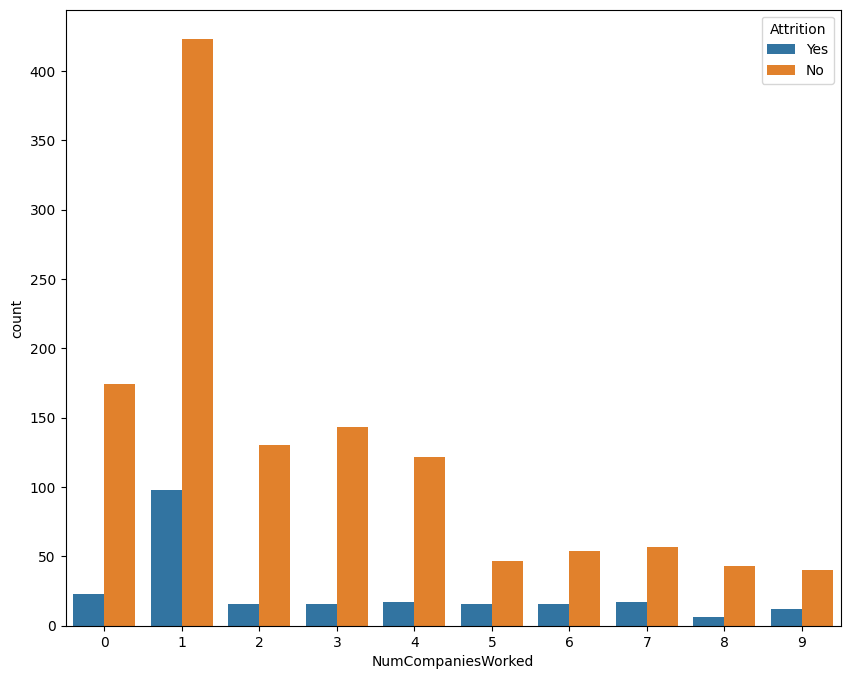

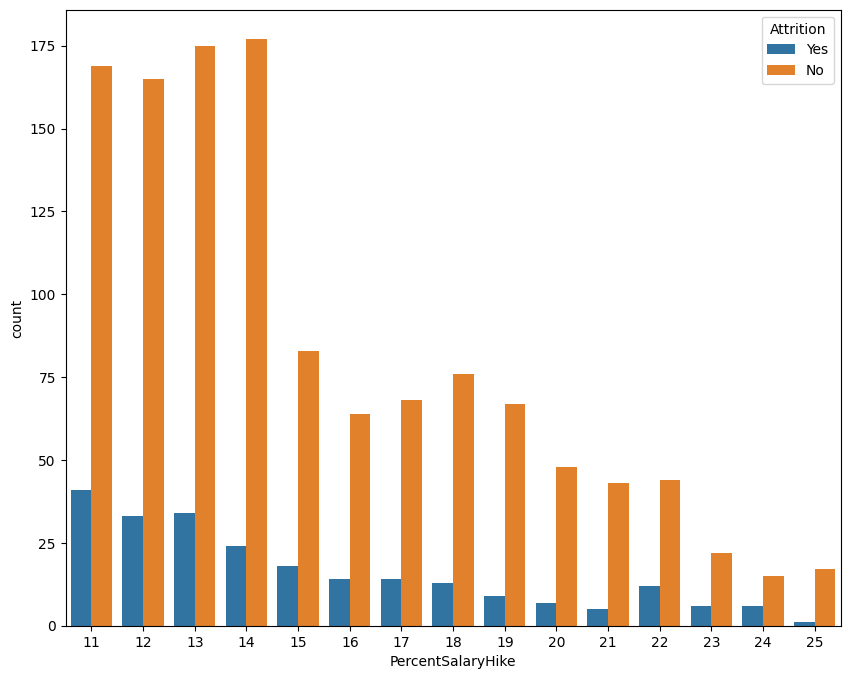

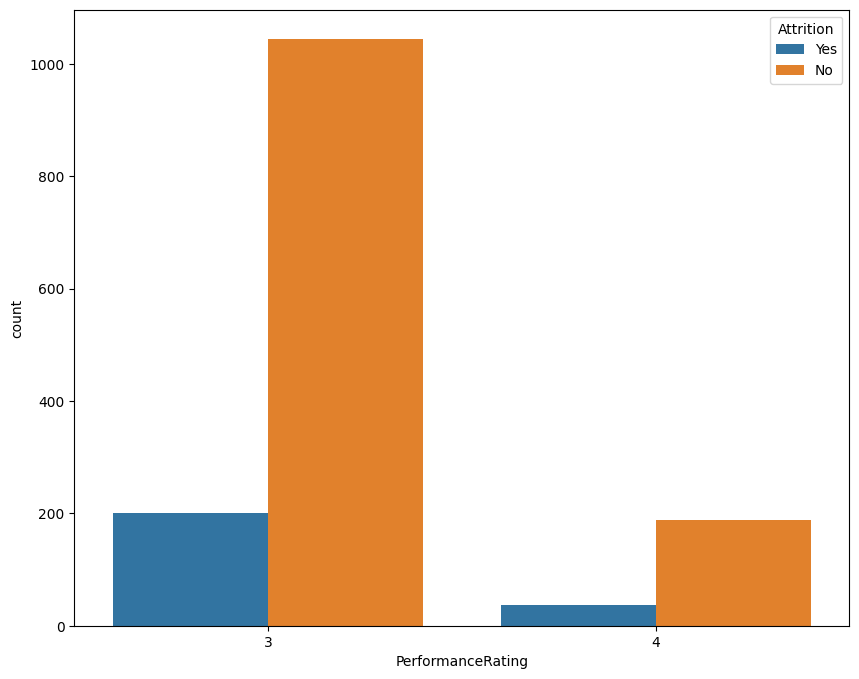

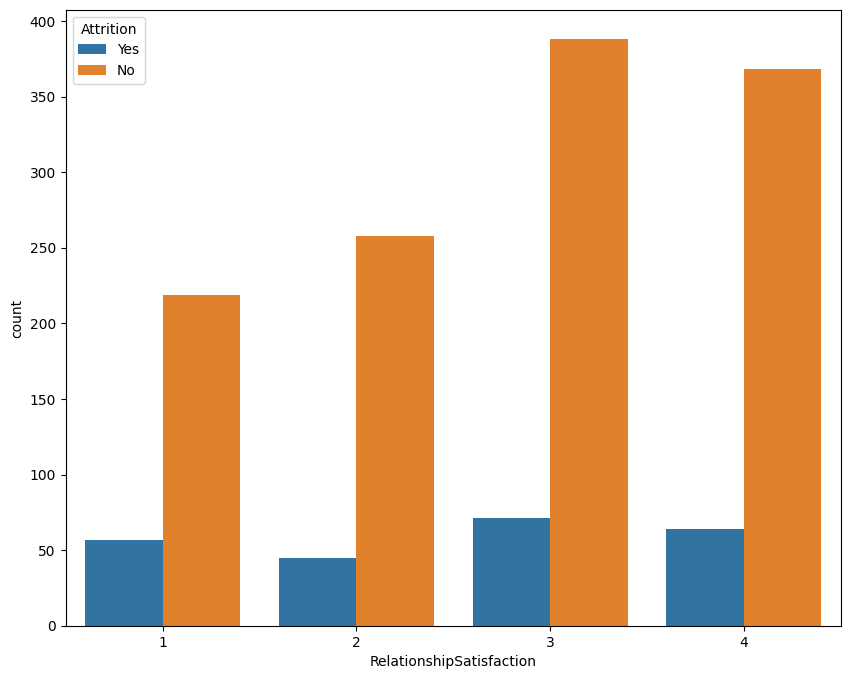

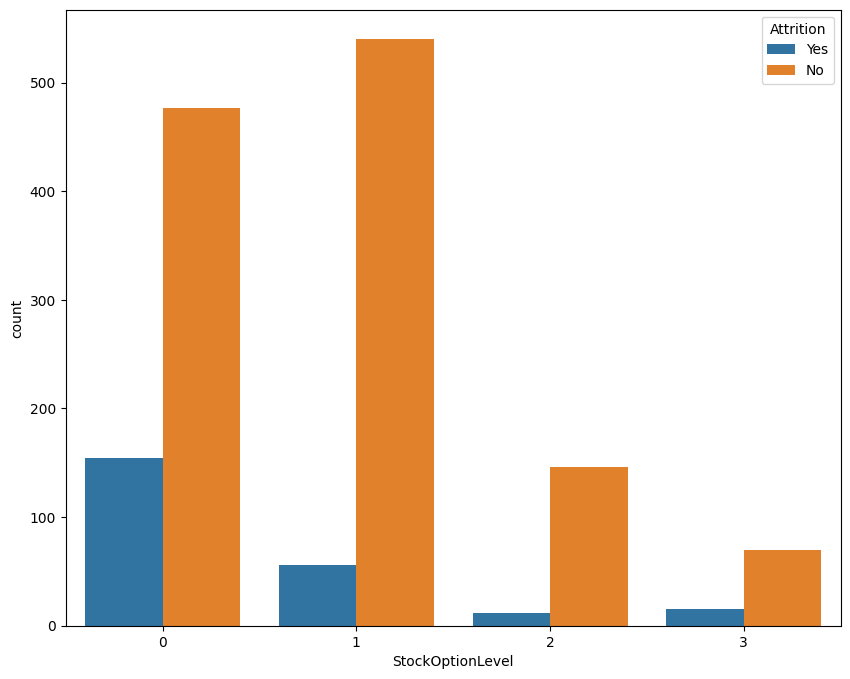

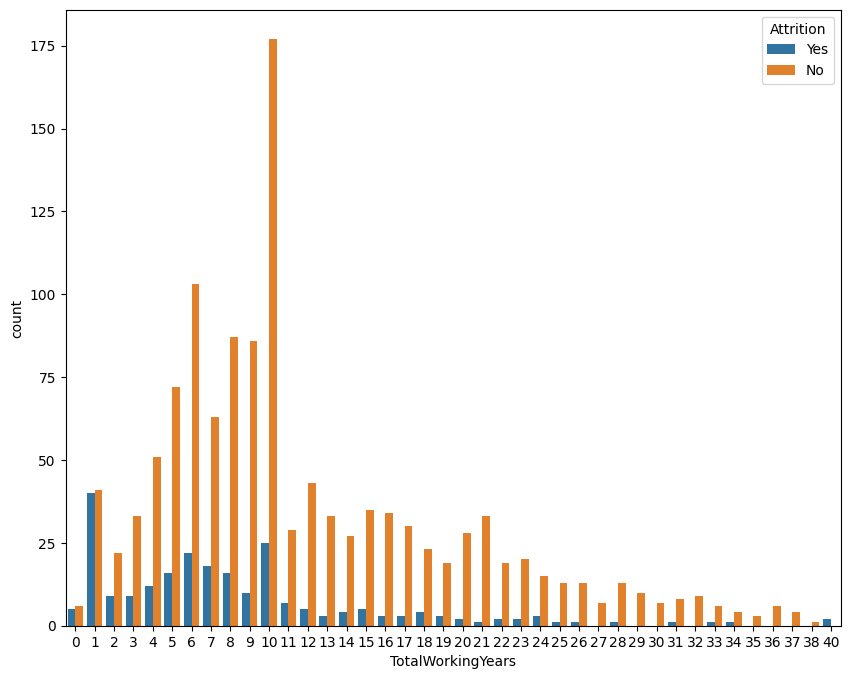

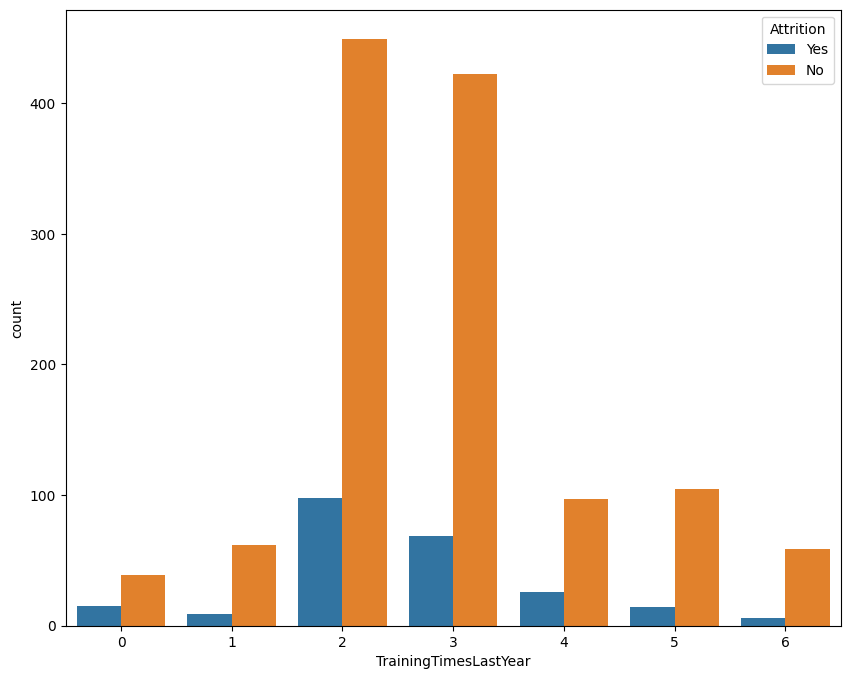

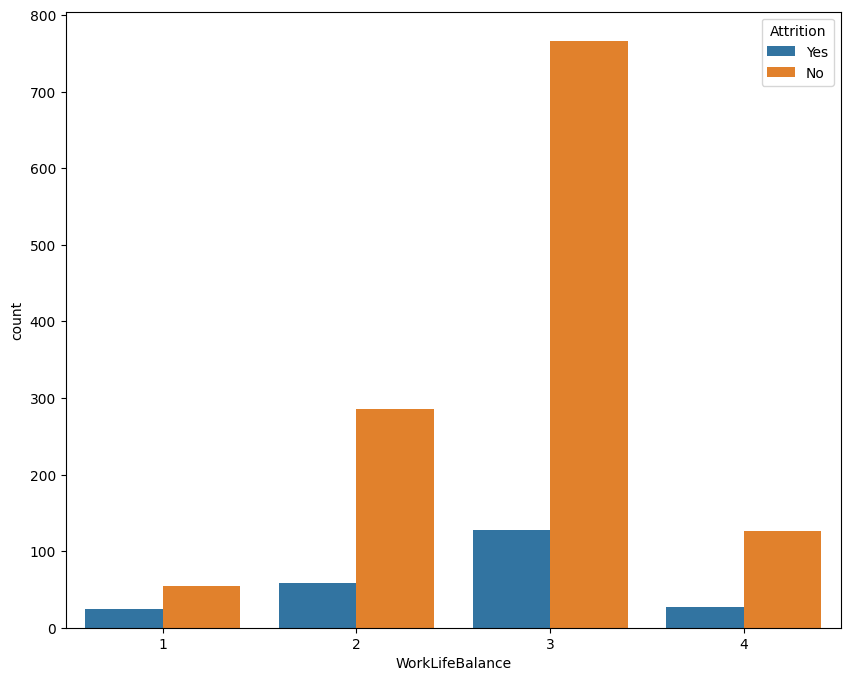

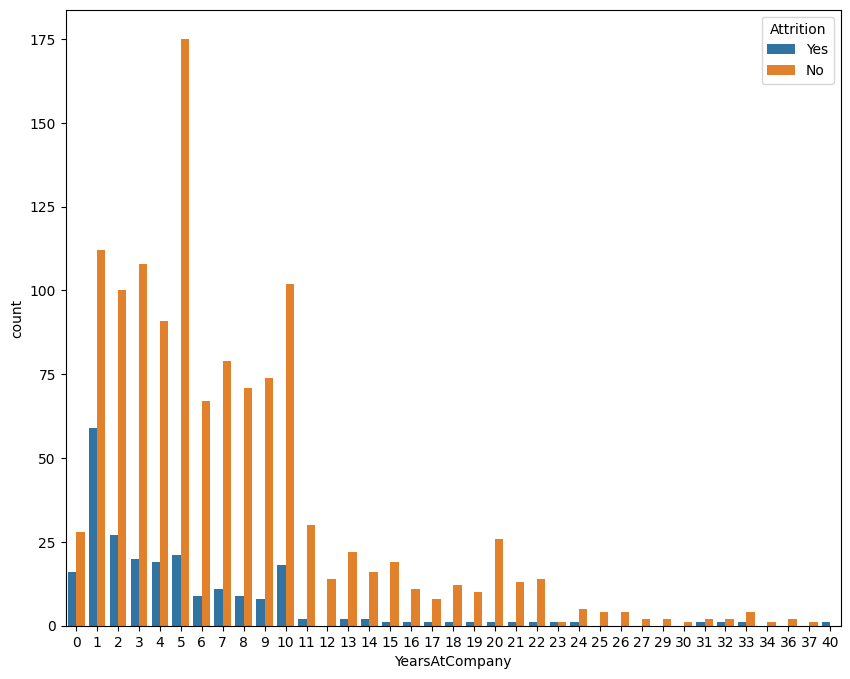

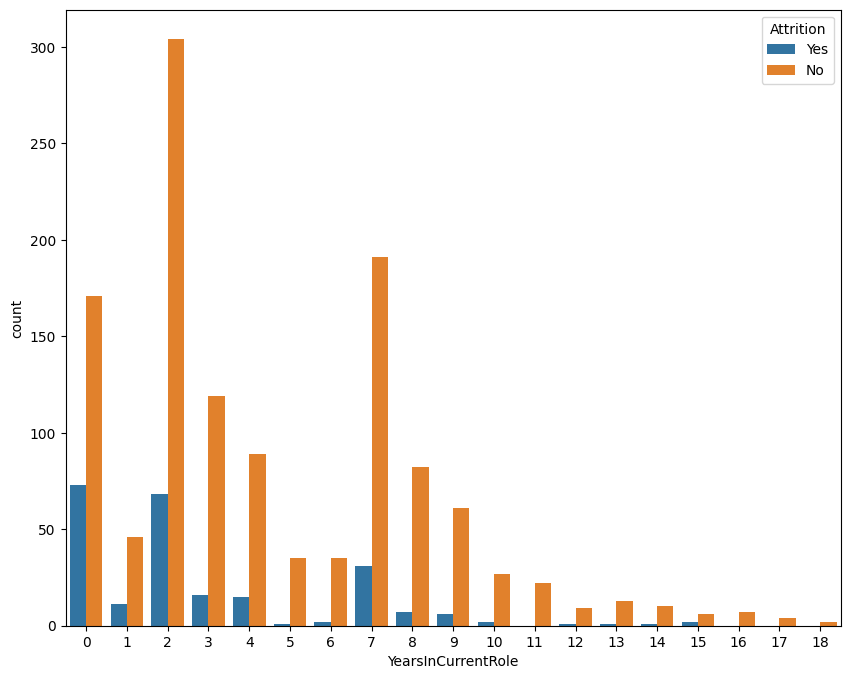

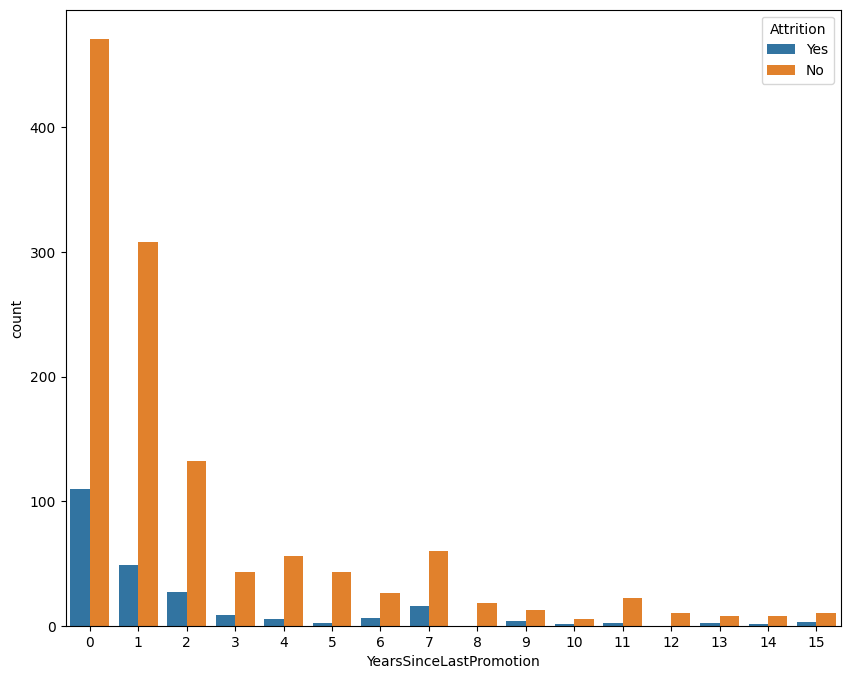

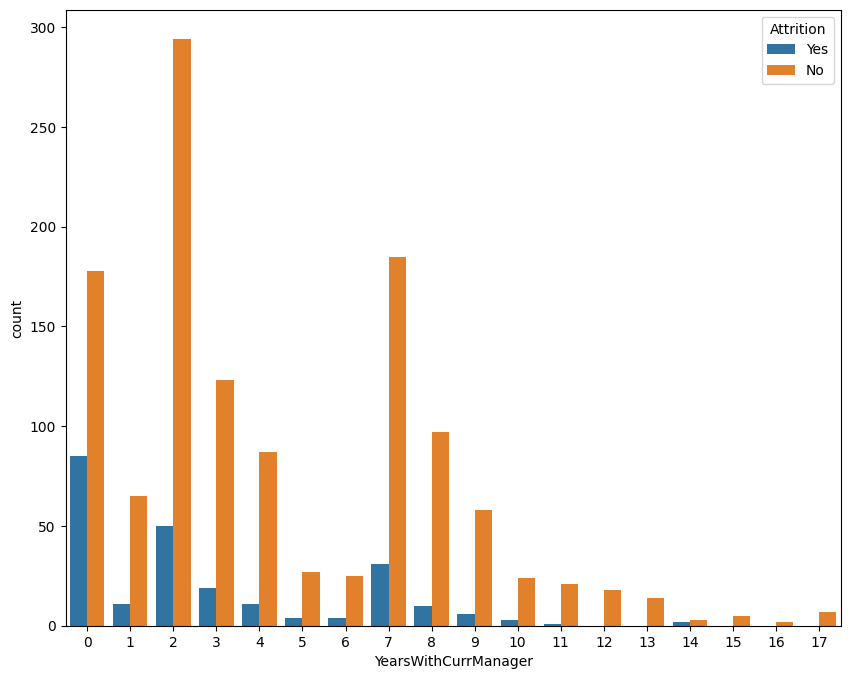

In [ ]:
#plots for discrete numerical variables
numerical_selected=['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

for i in numerical_selected:
 plt.figure(figsize=(10,8))
 sns.countplot(x=i,hue='Attrition',data=df)
 
 plt.show()

In [ ]:
import plotly.express as px
fig=px.strip(df,x='MonthlyIncome',y='Attrition',orientation='h',color='Attrition')
fig.show()

1. Young employees aged below 22 yrs, quit their jobs more than the rest.
2. Employees who travel more than 10 kms to reach office, are more likely to quit.
3. Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Job Involvement, Performance Rating, Stock Option Level, Work Life Balance: these features don't really help us in understanding the employees' attrition.
4. Employees with low Job Level, Monthly Income, Percent Salary Hike, Total Working Years, Years At Company are prone to quitting their jobs.
5. Employees who have worked in less than 2 comapanies, are more likely to stay.
6. Employees who have received promotion recently within 2 years, will stay than employees who haven't received any promotion for a long time.
7. Employees who have spent more than 2 years with their current manager, are more likely to stay.

In [ ]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


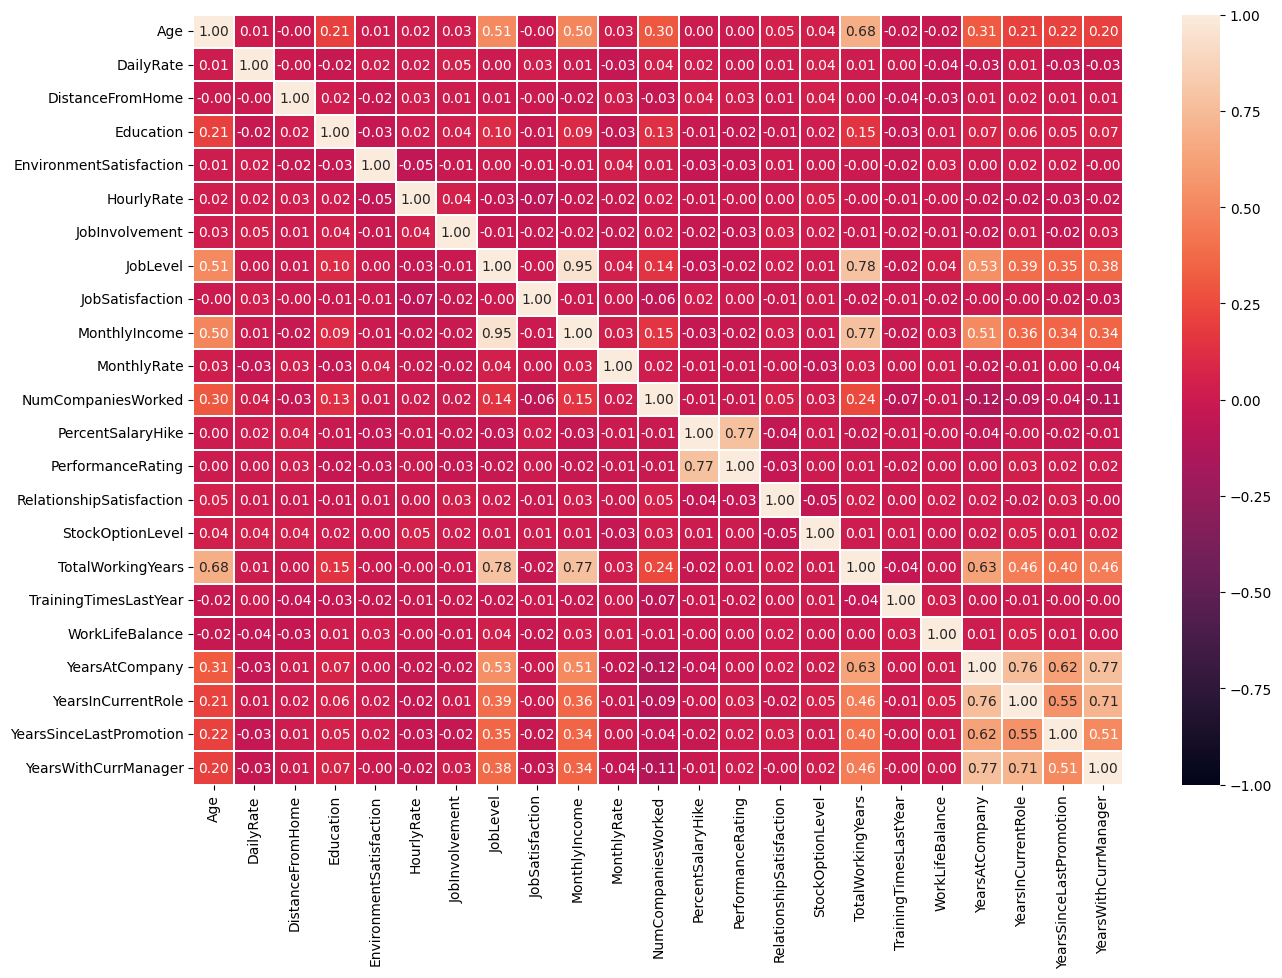

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.2,vmax=1,vmin=-1)
plt.show()

Observations :

1. Job Level and Monthly Income are highly correlated.
2. Monthly Income is highly correlated with Total Working Hours.
3. Job Level and Total Working Hours are highly correlated.
4. Performance Rating is highly correlated with Percent Salary Hike.
5. Years in Current Role and Years with Current Manager has high correlation with Years at Company.

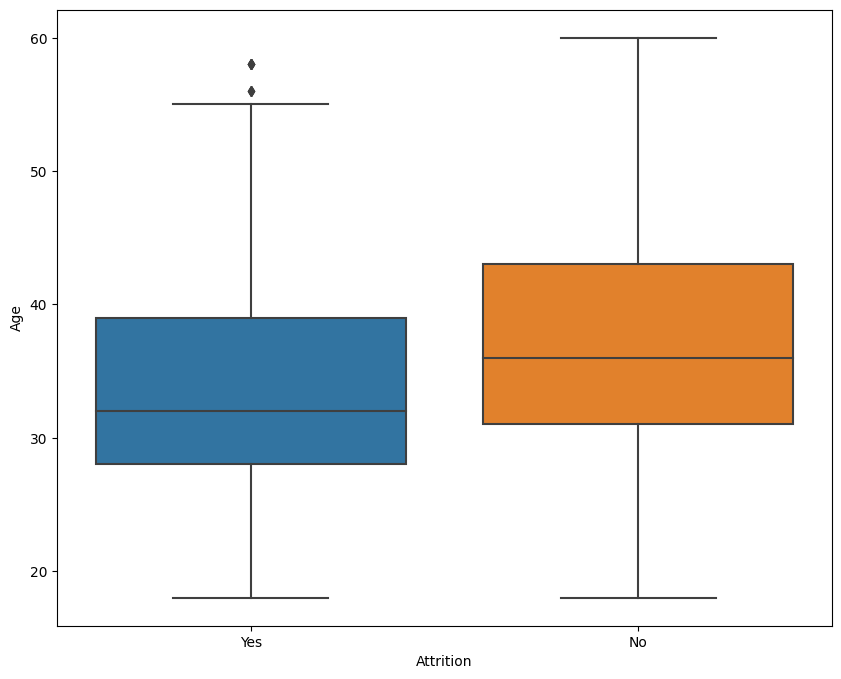

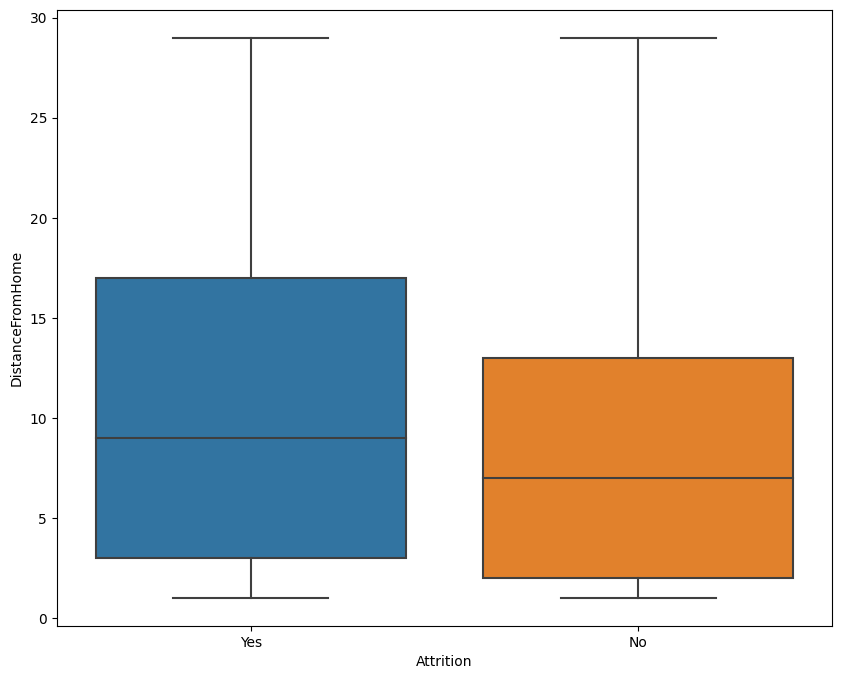

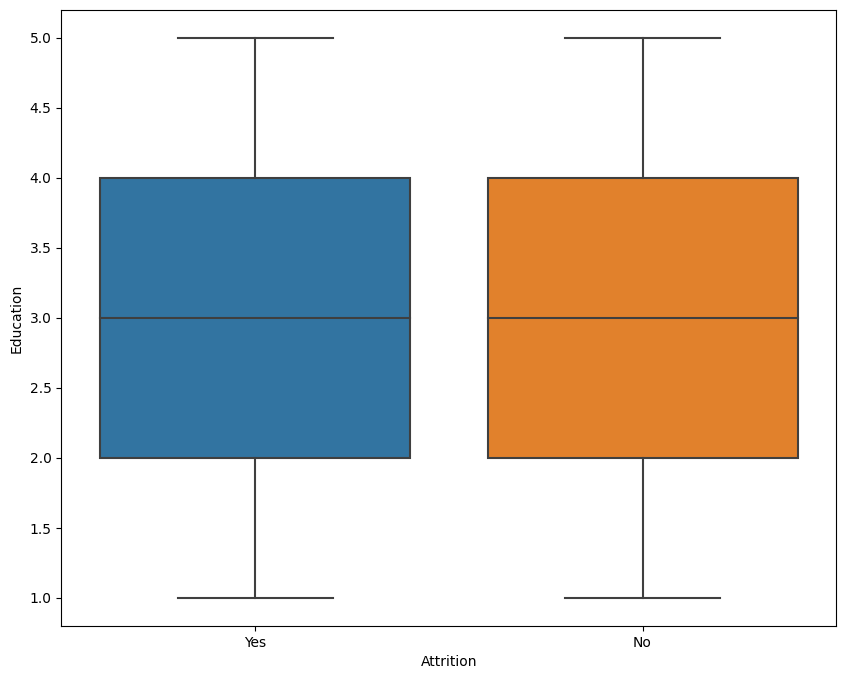

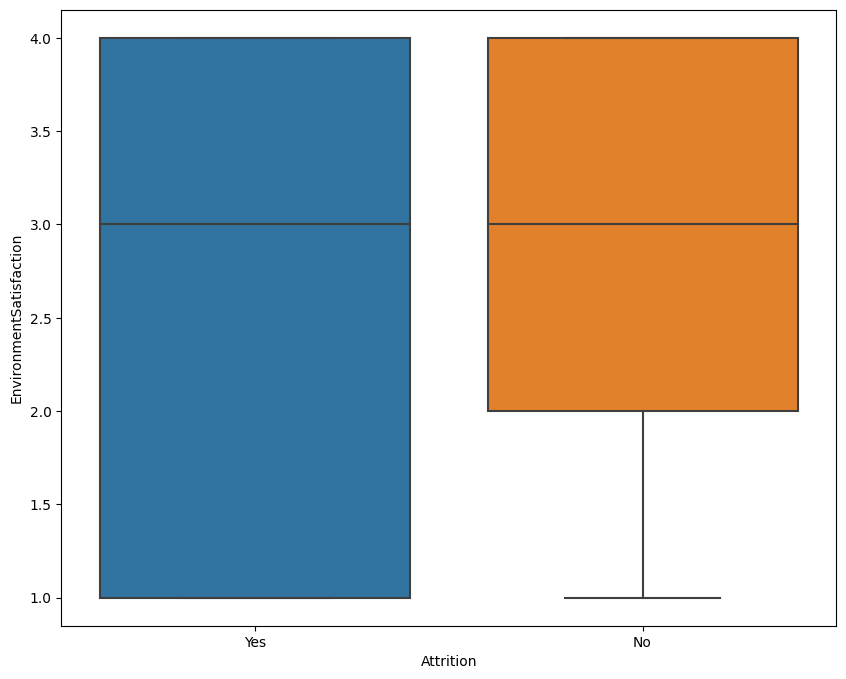

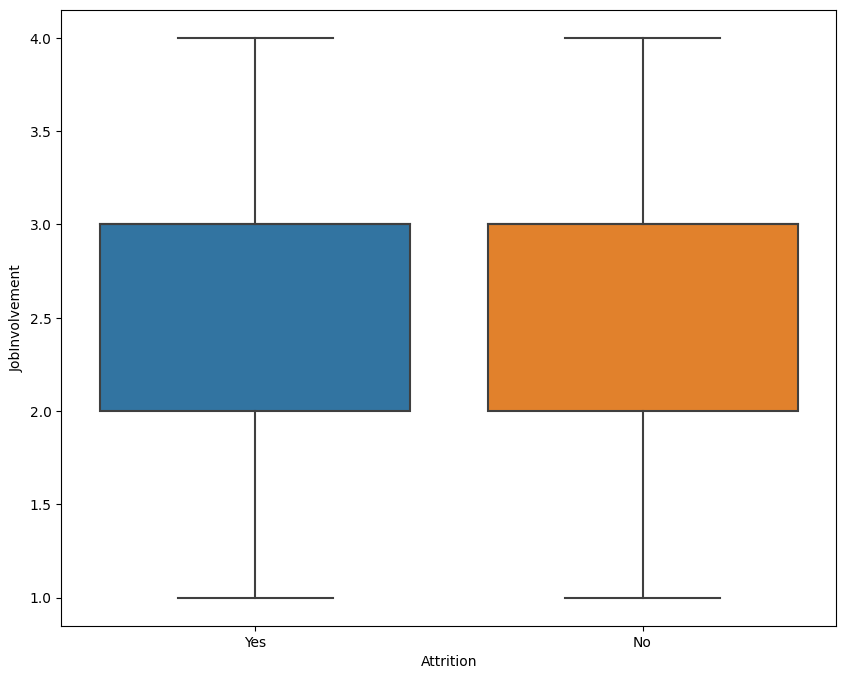

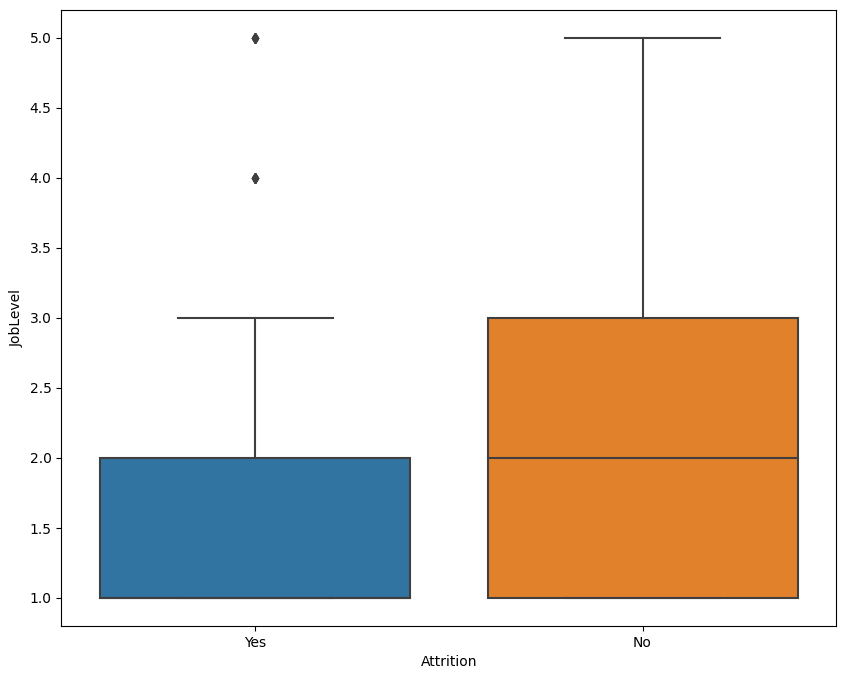

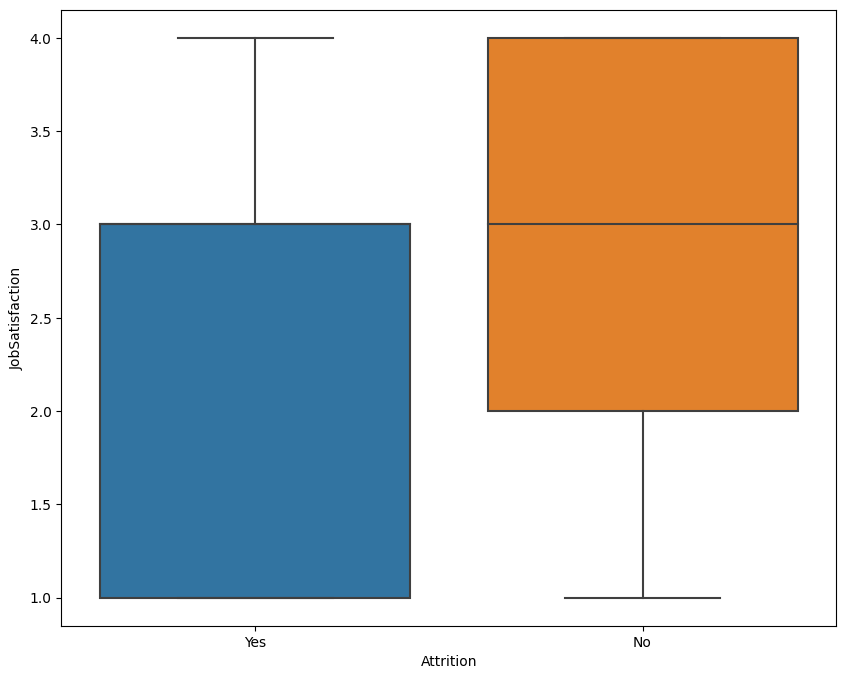

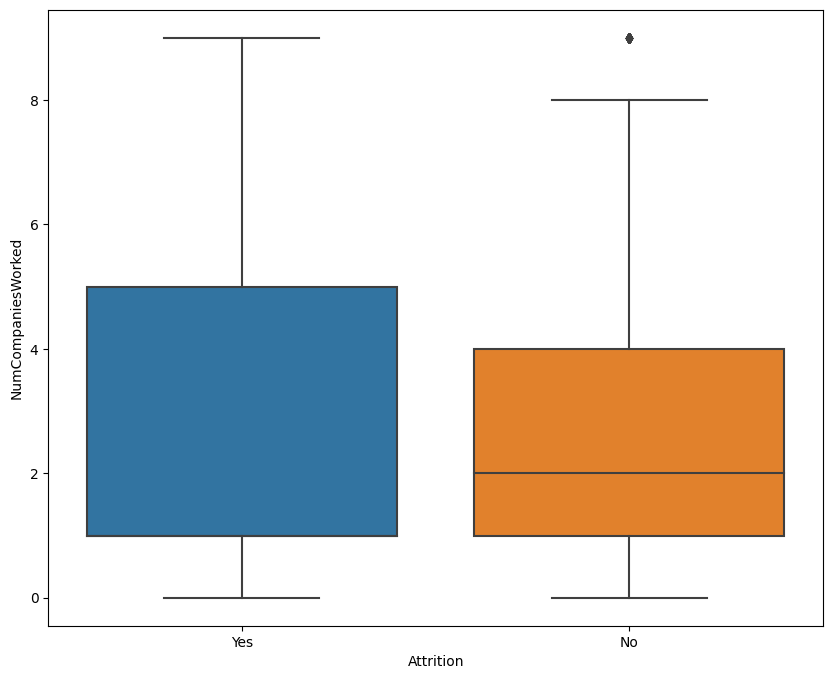

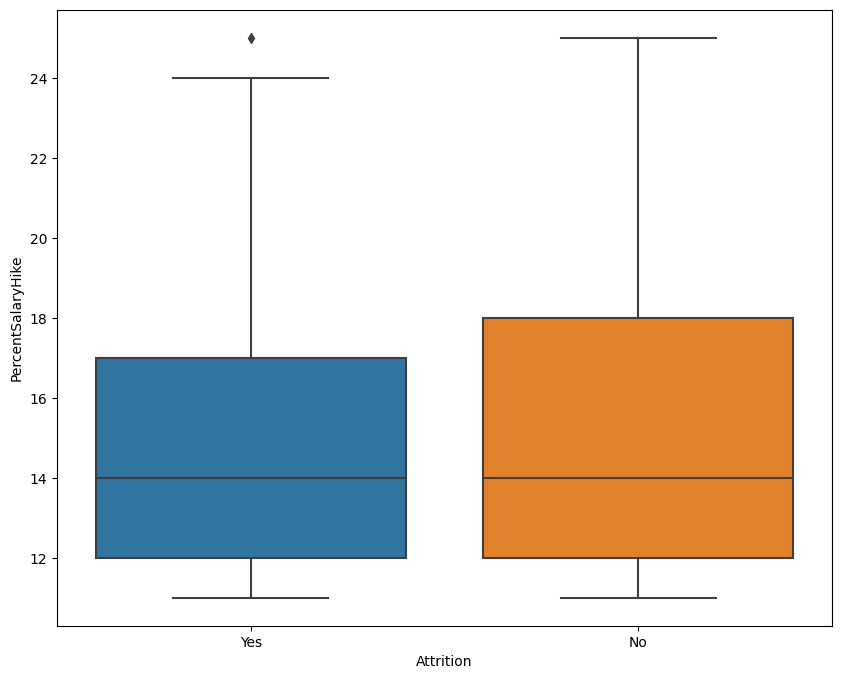

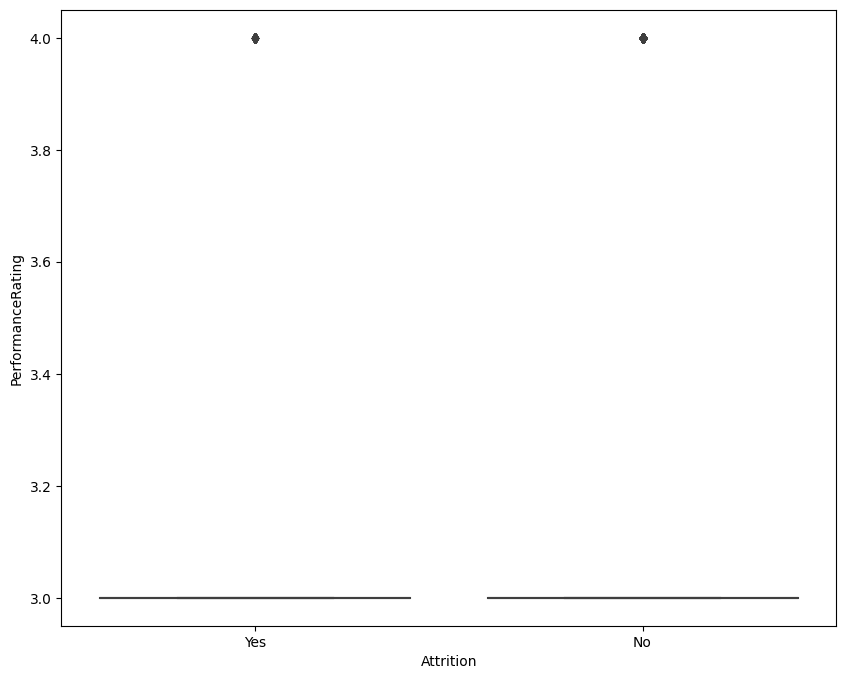

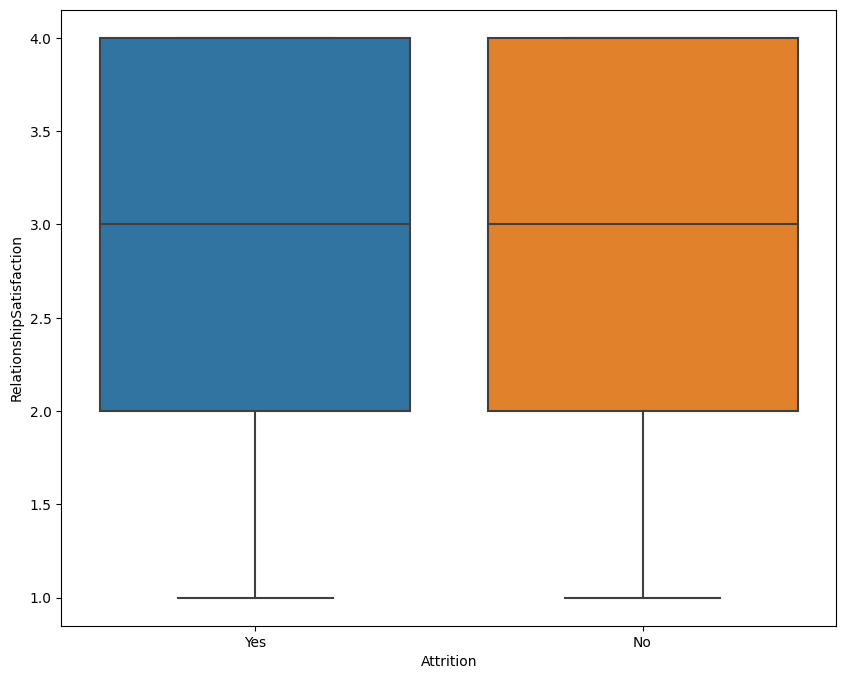

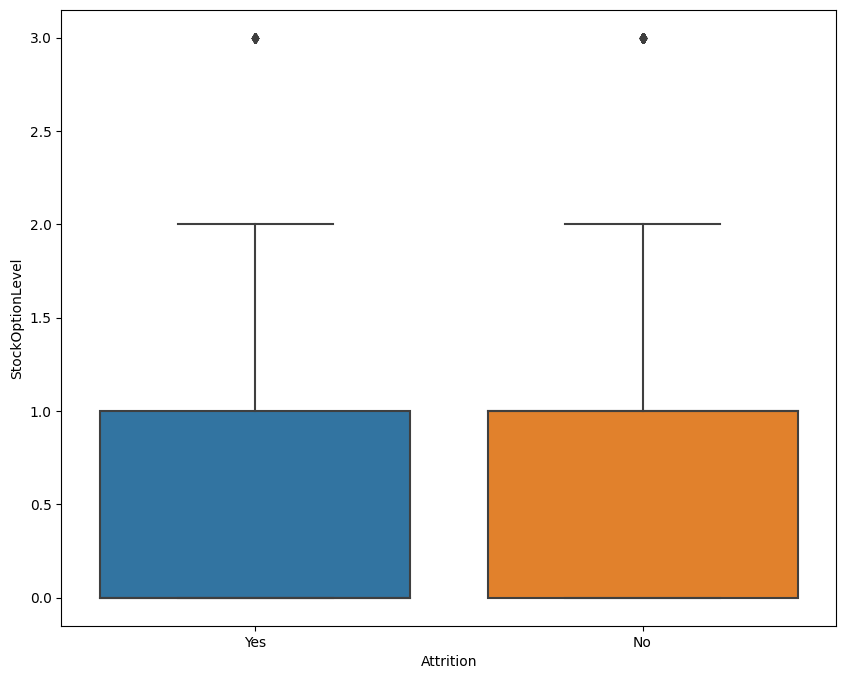

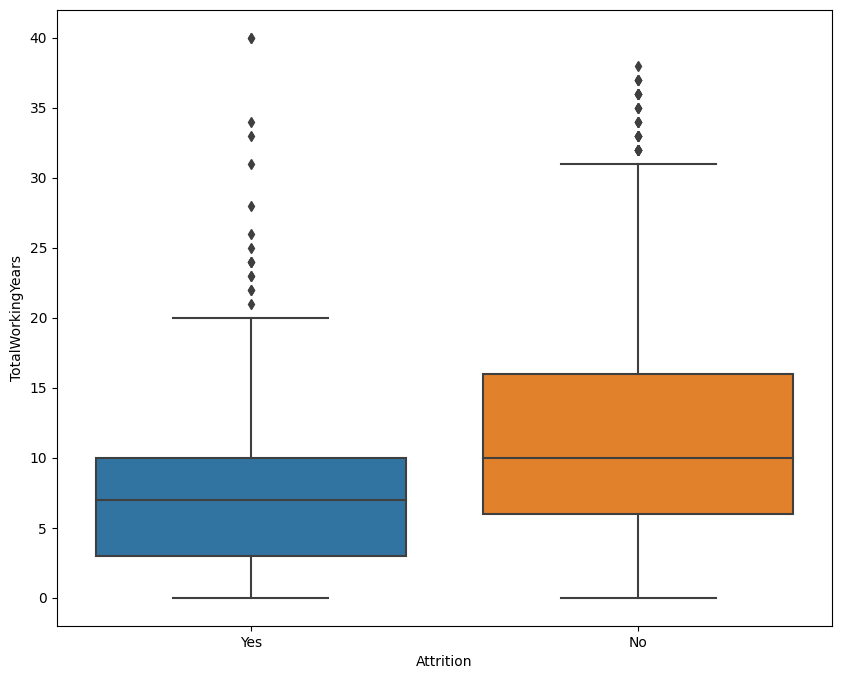

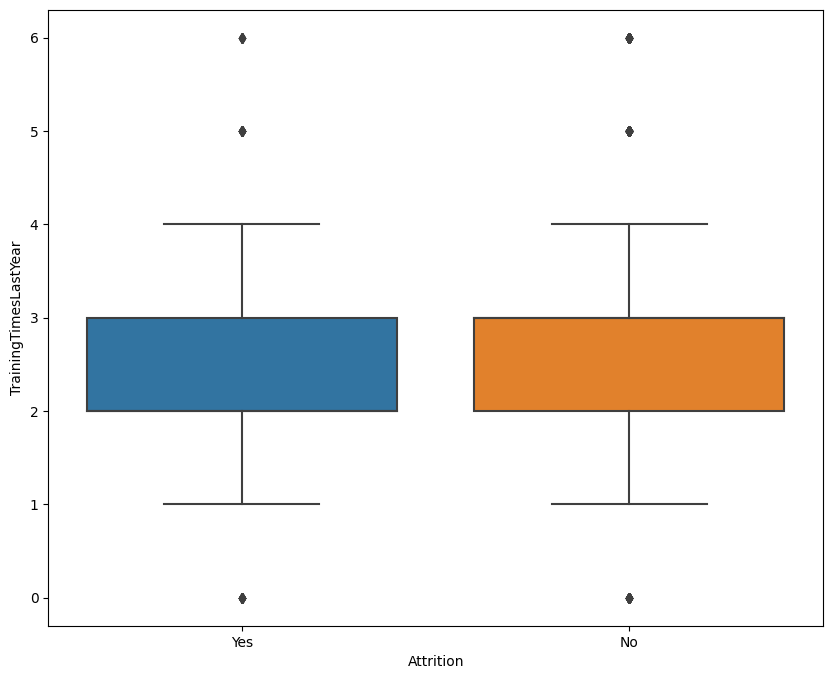

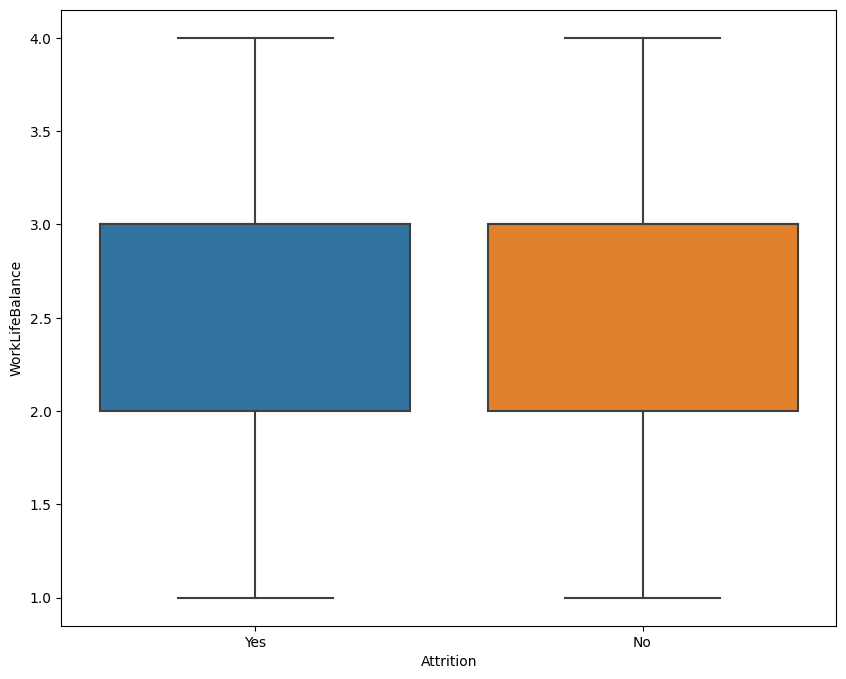

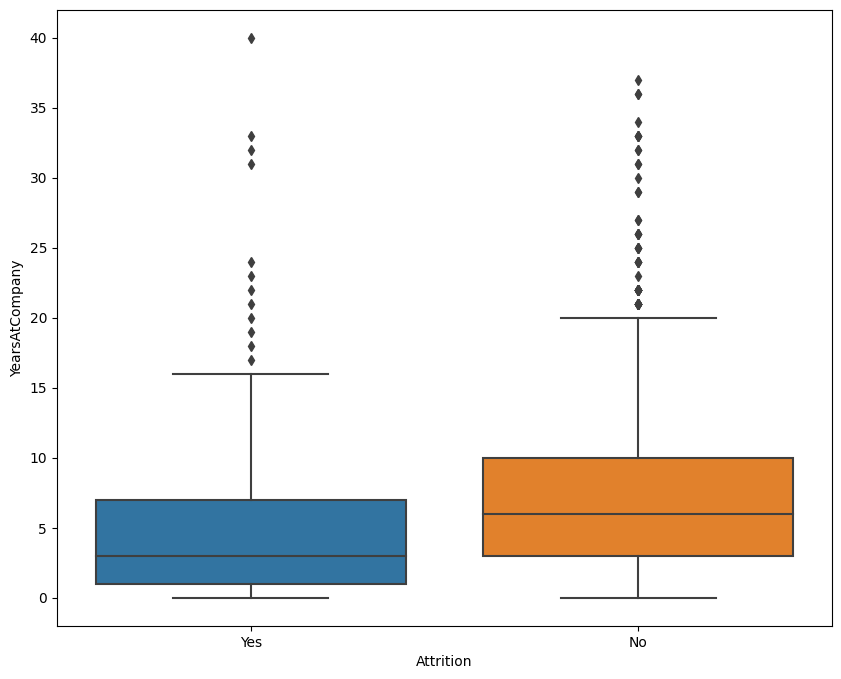

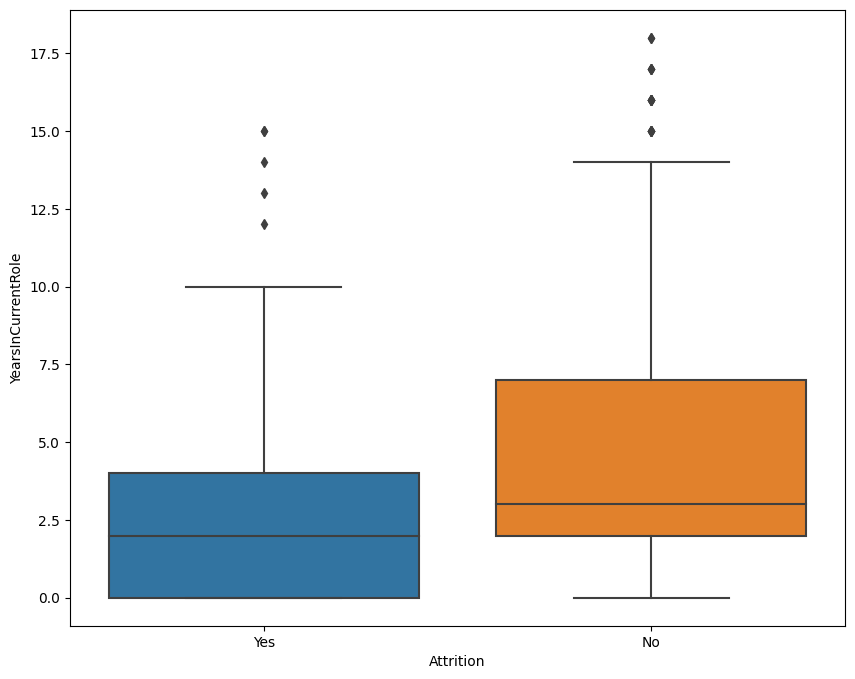

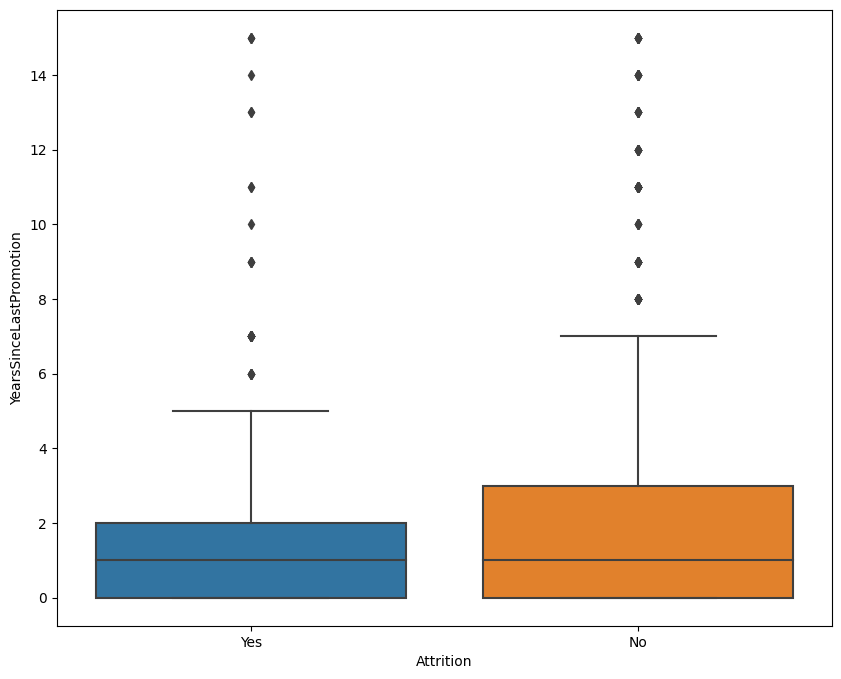

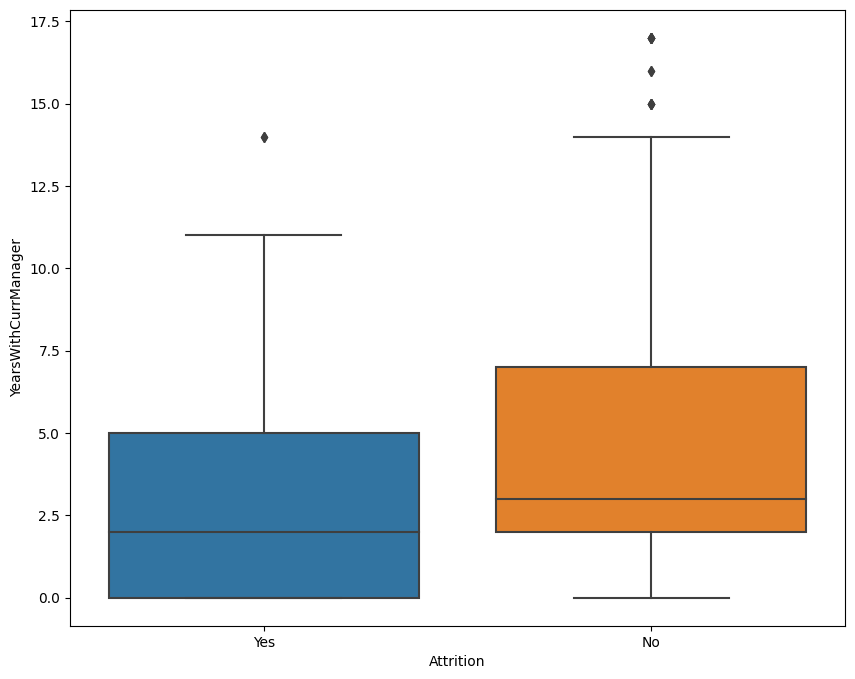

In [ ]:
#box plot for different numeric variables vs attrition to study about the outliers present in the dataset
for i in numerical_selected:
 plt.figure(figsize=(10,8))
 sns.boxplot(x=df['Attrition'],y=df[i],data=df)
 
 plt.show()

Observation :

Outliers are there but it will not effect our model.

# Data Processing

In [ ]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [ ]:
X=df.drop('Attrition',axis=1)
Y=df['Attrition']
print(X.shape)
print(Y.shape)

(1470, 30)
(1470,)


In [ ]:
#selecting out discrete continuous variables for encoding
columns_to_encode= []
for i in X.columns:
    if df[i].nunique() <20:
        columns_to_encode.append(i)
        
columns_to_encode

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
#one hot encoding
df_encoded=pd.get_dummies(X,columns=columns_to_encode,drop_first=True)
X=df_encoded
X

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1102,1,94,5993,19479,8,6,0,1,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,10,10,1,0,...,0,0,0,0,0,0,0,0,0,0
2,37,1373,2,92,2090,2396,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,33,1392,3,56,2909,23159,8,8,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27,591,2,40,3468,16632,6,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,17,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1466,39,613,6,42,9991,21457,9,7,0,1,...,0,0,0,0,0,0,0,0,0,0
1467,27,155,4,87,6142,5174,6,6,0,1,...,0,0,0,0,0,0,0,0,0,0
1468,49,1023,2,63,5390,13243,17,9,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.shape

(1470, 135)

In [ ]:
#encoding the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Y=le.fit_transform(Y)
Y=pd.DataFrame(Y)
Y=Y.rename(columns={0:'Attrition'})
Y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
Y['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Observation :
1. There is a huge difference between the total number of examples in the dataset having attrition 0 and attrition 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std)
X_train_std.columns=X.columns

X_test_std=pd.DataFrame(X_test_std)
X_test_std.columns=X.columns

In [ ]:
X_train_std = X_train_std.to_numpy()

In [ ]:
X_test_std = X_test_std.to_numpy()

# Model fitting

In [ ]:
X_train_std.shape


(1176, 135)

# Xception

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3 as GoogleNet
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.models import Sequential

In [ ]:
X_train_std = X_train_std.reshape(-1, 135, 1)
X_test_std = X_test_std.reshape(-1, 135, 1)

# Define the input shape
input_shape = (135, 1,1)

# Define the model architecture
base_model = Xception(input_shape=(224,224,3), include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_std, Y_train, epochs=10, batch_size=128, validation_data=(X_test_std, Y_test))

83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/10
10/10 [==============================] - 1s 26ms/step - loss: 0.7013 - accuracy: 0.5867 - val_loss: 0.6555 - val_accuracy: 0.6054
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6129 - accuracy: 0.6862 - val_loss: 0.5951 - val_accuracy: 0.6735
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5502 - accuracy: 0.7517 - val_loss: 0.5513 - val_accuracy: 0.7415
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5022 - accuracy: 0.7942 - val_loss: 0.5208 - val_accuracy: 0.7687
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4666 - accuracy: 0.8138 - val_loss: 0.5008 - val_accuracy: 0.7925
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4391 - accuracy: 0.8274 - val_loss: 0.4849 - val_accuracy: 0.8197
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4166 - accuracy: 0.8

# Inception

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.models import Sequential

In [ ]:
X_train_std = X_train_std.reshape(-1, 135, 1)
X_test_std = X_test_std.reshape(-1, 135, 1)

# Define the input shape
input_shape = (135, 1,1)

# Define the model architecture
base_model = InceptionV3(input_shape=(224,224,3), include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu')) 
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_std, Y_train, epochs=20, batch_size=16)

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/20
74/74 [==============================] - 2s 5ms/step - loss: 0.4870 - accuracy: 0.8180
Epoch 2/20
74/74 [==============================] - 0s 7ms/step - loss: 0.3896 - accuracy: 0.8384
Epoch 3/20
74/74 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.8384
Epoch 4/20
74/74 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8384
Epoch 5/20
74/74 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.8435
Epoch 6/20
74/74 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.8580
Epoch 7/20
74/74 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.8741
Epoch 8/20
74/74 [==============================] - 0s 3ms/step - loss: 0.2095 - accuracy: 0.9022
Epoch 9/20
74/74 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9252
Epoch 10/20
74/74 [==============================] - 

# from tensorflow.keras.applications.googlenet import GoogLeNet

In [ ]:
# from tensorflow.keras.applications.googlenet import GoogLeNet
# from tensorflow.keras.applications.inception_v3 import InceptionV3
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.models import Sequential

In [ ]:
X_train_std = X_train_std.reshape(-1, 135, 1)
X_test_std = X_test_std.reshape(-1, 135, 1)

# Define the input shape
input_shape = (135, 1,1)

# Define the model architecture
base_model = GoogleNet(input_shape=(224,224,3), include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(8, activation='relu')) 
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_std, Y_train, epochs=20, batch_size=16, validation_data=(X_test_std, Y_test))

Epoch 1/20
74/74 [==============================] - 5s 13ms/step - loss: 0.4767 - accuracy: 0.8274 - val_loss: 0.4405 - val_accuracy: 0.8401
Epoch 2/20
74/74 [==============================] - 0s 5ms/step - loss: 0.3937 - accuracy: 0.8384 - val_loss: 0.4229 - val_accuracy: 0.8401
Epoch 3/20
74/74 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.8384 - val_loss: 0.4153 - val_accuracy: 0.8401
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8452 - val_loss: 0.4171 - val_accuracy: 0.8503
Epoch 5/20
74/74 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8733 - val_loss: 0.4187 - val_accuracy: 0.8435
Epoch 6/20
74/74 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.8980 - val_loss: 0.4281 - val_accuracy: 0.8367
Epoch 7/20
74/74 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.9201 - val_loss: 0.4350 - val_accuracy: 0.8333
Epoch 8/20
74/74 [=

# Densenet


In [ ]:
X_train_std = X_train_std.reshape(-1, 135, 1)
X_test_std = X_test_std.reshape(-1, 135, 1)

# Define the input shape
input_shape = (135, 1,1)

# Define the model architecture
base_model = tf.keras.applications.DenseNet201(input_shape=(224,224,3), include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(8, activation='relu')) 
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_std, Y_train, epochs=20, batch_size=16, validation_data=(X_test_std, Y_test))

74836368/74836368 [==============================] - 1s 0us/step
Epoch 1/20
74/74 [==============================] - 1s 5ms/step - loss: 0.5501 - accuracy: 0.7993 - val_loss: 0.4635 - val_accuracy: 0.8401
Epoch 2/20
74/74 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8384 - val_loss: 0.4343 - val_accuracy: 0.8401
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8384 - val_loss: 0.4189 - val_accuracy: 0.8401
Epoch 4/20
74/74 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8384 - val_loss: 0.4074 - val_accuracy: 0.8401
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8393 - val_loss: 0.4085 - val_accuracy: 0.8401
Epoch 6/20
74/74 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8418 - val_loss: 0.4027 - val_accuracy: 0.8333
Epoch 7/20
74/74 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.85

# Alexnet

In [ ]:
from tensorflow import keras

model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(8, activation='relu')) 
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_std, Y_train, epochs=20, batch_size=16, validation_data=(X_test_std, Y_test))

Epoch 1/20
74/74 [==============================] - 2s 10ms/step - loss: 0.5694 - accuracy: 0.7381 - val_loss: 0.4458 - val_accuracy: 0.8401
Epoch 2/20
74/74 [==============================] - 0s 7ms/step - loss: 0.4108 - accuracy: 0.8384 - val_loss: 0.4214 - val_accuracy: 0.8435
Epoch 3/20
74/74 [==============================] - 0s 7ms/step - loss: 0.3646 - accuracy: 0.8427 - val_loss: 0.4081 - val_accuracy: 0.8469
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 0.3214 - accuracy: 0.8614 - val_loss: 0.4005 - val_accuracy: 0.8435
Epoch 5/20
74/74 [==============================] - 1s 8ms/step - loss: 0.2778 - accuracy: 0.8827 - val_loss: 0.3998 - val_accuracy: 0.8537
Epoch 6/20
74/74 [==============================] - 1s 7ms/step - loss: 0.2311 - accuracy: 0.9124 - val_loss: 0.4037 - val_accuracy: 0.8537
Epoch 7/20
74/74 [==============================] - 1s 11ms/step - loss: 0.1813 - accuracy: 0.9396 - val_loss: 0.4076 - val_accuracy: 0.8673
Epoch 8/20
74/74 [

<BarContainer object of 2 artists>

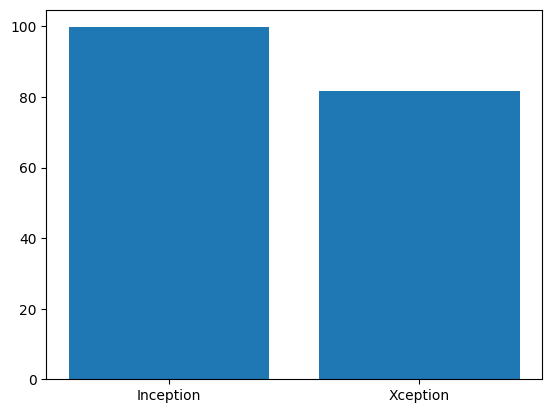

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Inception', 'Xception'],[99.74, 81.64])

<BarContainer object of 2 artists>

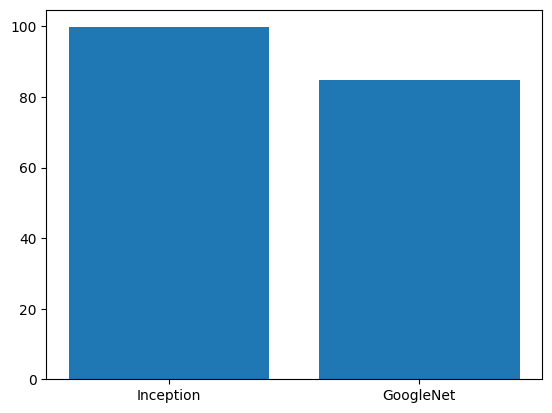

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Inception', 'GoogleNet'],[99.74, 84.69])

<BarContainer object of 2 artists>

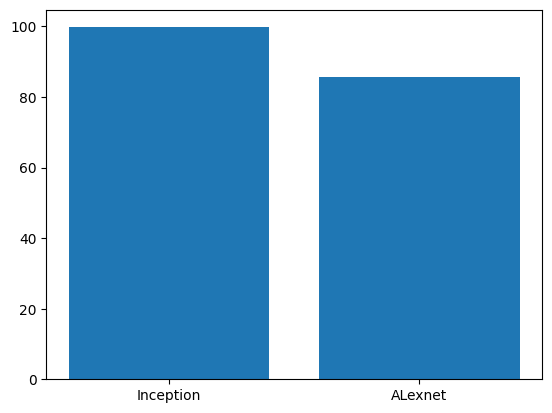

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Inception', 'ALexnet'],[99.74, 85.71])

<BarContainer object of 2 artists>

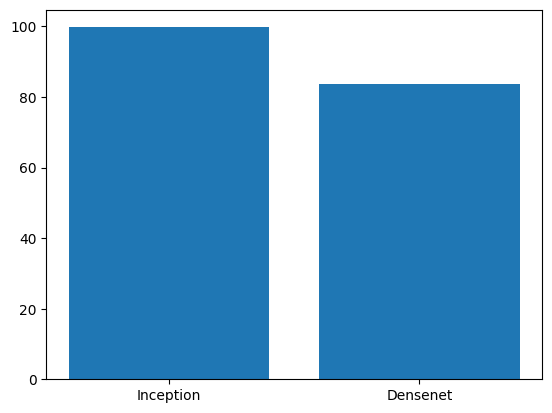

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Inception', 'Densenet'],[99.74, 83.67])